In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings


from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from mlxtend.evaluate import bias_variance_decomp

%matplotlib inline
#IMPORT 5 CLASSIFIERS ALGORITHMS FROM SKLEARN
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


sns.set(rc={'figure.figsize':(10,7)})
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#INSTANTIATE 5 ALGORITHMS/ESTIMATORS
rfc = RandomForestClassifier(criterion = "entropy", max_depth = 10, random_state=42)
dtc = DecisionTreeClassifier(criterion = "gini", splitter="best", random_state=42)
etc = ExtraTreesClassifier(max_features = "sqrt", random_state=42)
adc = AdaBoostClassifier(learning_rate = 2.0, random_state=42)
knc = KNeighborsClassifier(algorithm = "brute", leaf_size=50)

In [3]:
df = pd.read_csv(r'C:\thesis\updt_datasets_clf.csv)
df2 = pd.read_csv("r'C:\thesis\updt_datasets_clf.c'sv")
df

SyntaxError: EOL while scanning string literal (4045803050.py, line 1)

-------

# EXPLORE DATAFRAME

In [3]:
#Dimension of the raw dataframe
print("Dimension of the data raw dataframe Rows by Columns, ", df.shape)
print("\nDataset Columns, ", df.columns)

Dimension of the data raw dataframe Rows by Columns,  (327, 51)

Dataset Columns,  Index(['student_id', 'age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'fam_support', 'working_stud', 'scholar', 'personality_type', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'GPA', 'gpa_range'],
      dtype='object')


In [4]:
#check Dataframe with null values
df2.isna().sum()

student_id             0
age                   11
sex                    6
course                 0
yr_level               0
socioeconomic_stat     0
fam_support            0
working_stud           0
scholar                0
personality_type       0
TM1                    0
TM2                    0
TM3                    0
TM4                    0
TM5                    0
TM6                    0
TM7                    0
CAP1                   0
CAP2                   0
CAP3                   1
CAP4                   0
GSS1                   0
GSS2                   0
GSS3                   0
GSS4                   0
GSS5                   0
GSS6                   0
GSS7                   0
EP1                    0
EP2                    0
EP3                    0
EP4                    0
EP5                    0
EP6                    0
NT1                    0
NT2                    0
NT3                    0
desktop                0
laptop                 0
mobile_phone           0


It appears that the dataset's has number/s of nul value specifically within the column of:
* age
* sex
* CAP3

-----

# DATA CLEANING

In [5]:
#Check Sex consistency
print("Sex Attributes :" ,df2.sex.unique())
print("""  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.""""" )

#checking missing value for sex
print("\nNumber of missing values of Sex","[" ,df2.sex.isna().sum(), "]")

#Replace Sex value with a precise value 'S' and 'M' and Fill values
df["sex"].replace("M ", "M", inplace = True)
df["sex"].replace("F ", "F", inplace = True)
df["sex"].fillna(method="ffill", inplace=True)

#Check uniqueness of Sex
print("\nUpdated Attributes inside Sex : " ,df["sex"].unique())

print("\nNumber of missing values of Sex","[" ,df.sex.isna().sum(), "]")

#Values of each attribute for Sex
valueCounts_MaleFemale = df.sex.value_counts()
valueCounts_MaleFemale

Sex Attributes : ['F' 'M' nan 'M ' 'F ']
  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.

Number of missing values of Sex [ 6 ]

Updated Attributes inside Sex :  ['F' 'M']

Number of missing values of Sex [ 0 ]


F    181
M    146
Name: sex, dtype: int64

In [6]:
#Check uniqueness for age
Age_Unique = df.age.sort_values().unique()
Age_Unique

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., nan])

In [7]:
#Check for missing values for age
AgeMissing = df2["age"].isna().sum()
print("\nNumber of missing value of age : ", AgeMissing, " missing")

#Filling missing values for age with mean.
df.age.fillna(df["age"].mean(), inplace = True)

#Check for missing values for age
print("\nNumber of missing value of age : ", df["age"].isna().sum(), " missing")


Number of missing value of age :  11  missing

Number of missing value of age :  0  missing


In [8]:
#fill missing values for CAP3
df["CAP3"].fillna(method="ffill", inplace = True)
print("\nNumber of missing value of CAP3 : ", df["CAP3"].isna().sum())


Number of missing value of CAP3 :  0


In [9]:
print("Dataframe has no missing value")
df.isna().sum()

Dataframe has no missing value


student_id            0
age                   0
sex                   0
course                0
yr_level              0
socioeconomic_stat    0
fam_support           0
working_stud          0
scholar               0
personality_type      0
TM1                   0
TM2                   0
TM3                   0
TM4                   0
TM5                   0
TM6                   0
TM7                   0
CAP1                  0
CAP2                  0
CAP3                  0
CAP4                  0
GSS1                  0
GSS2                  0
GSS3                  0
GSS4                  0
GSS5                  0
GSS6                  0
GSS7                  0
EP1                   0
EP2                   0
EP3                   0
EP4                   0
EP5                   0
EP6                   0
NT1                   0
NT2                   0
NT3                   0
desktop               0
laptop                0
mobile_phone          0
tablet                0
wifi            

-----

# RECONSTRUCTING VALUES INSIDE COLUMNS

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          327 non-null    object 
 1   age                 327 non-null    float64
 2   sex                 327 non-null    object 
 3   course              327 non-null    object 
 4   yr_level            327 non-null    int64  
 5   socioeconomic_stat  327 non-null    object 
 6   fam_support         327 non-null    object 
 7   working_stud        327 non-null    object 
 8   scholar             327 non-null    object 
 9   personality_type    327 non-null    object 
 10  TM1                 327 non-null    object 
 11  TM2                 327 non-null    object 
 12  TM3                 327 non-null    object 
 13  TM4                 327 non-null    object 
 14  TM5                 327 non-null    object 
 15  TM6                 327 non-null    object 
 16  TM7     

In [11]:
#PRINT UNIQUENESS OF ALL FEATURES EXCEPT STUDENT
print(" Unique of age : ", df2["age"].unique(), "\n")
print(" Unique of sex : ", df2["sex"].unique(), "\n")
print(" Unique of course : ", df2["course"].unique(), "\n")
print(" Unique of yr_level: ", df2["yr_level"].unique(), "\n")
print(" Unique of socioeconomic_stat : ", df2["socioeconomic_stat"].unique(), "\n")
print(" Unique of fam_support : ", df2["fam_support"].unique(), "\n")
print(" Unique of working_stud : ", df2["working_stud"].unique(), "\n")
print(" Unique of scholar : ", df2["scholar"].unique(), "\n")
print(" Unique of personality_type : ", df2["personality_type"].unique(), "\n")
print(" Unique of TM1 : ", df2["TM1"].unique(), "\n")
print(" Unique of TM2 : ", df2["TM2"].unique(), "\n")
print(" Unique of TM3 : ", df2["TM3"].unique(), "\n")
print(" Unique of TM4 : ", df2["TM4"].unique(), "\n")
print(" Unique of TM5 : ", df2["TM5"].unique(), "\n")
print(" Unique of TM6 : ", df2["TM6"].unique(), "\n")
print(" Unique of TM7 : ", df2["TM7"].unique(), "\n")
print(" Unique of CAP1 : ", df2["CAP1"].unique(), "\n")
print(" Unique of CAP2 : ", df2["CAP2"].unique(), "\n")
print(" Unique of CAP3 : ", df2["CAP3"].unique(), "\n")
print(" Unique of CAP4 : ", df2["CAP4"].unique(), "\n")
print(" Unique of GSS1 : ", df2["GSS1"].unique(), "\n")
print(" Unique of GSS2 : ", df2["GSS2"].unique(), "\n")
print(" Unique of GSS3 : ", df2["GSS3"].unique(), "\n")
print(" Unique of GSS4 : ", df2["GSS4"].unique(), "\n")
print(" Unique of GSS5 : ", df2["GSS5"].unique(), "\n")
print(" Unique of GSS6 : ", df2["GSS6"].unique(), "\n")
print(" Unique of GSS7 : ", df2["GSS7"].unique(), "\n")
print(" Unique of EP1 : ", df2["EP1"].unique(), "\n")
print(" Unique of EP2 : ", df2["EP2"].unique(), "\n")
print(" Unique of EP3 : ", df2["EP3"].unique(), "\n")
print(" Unique of EP4 : ", df2["EP4"].unique(), "\n")
print(" Unique of EP5 : ", df2["EP5"].unique(), "\n")
print(" Unique of EP6 : ", df2["EP6"].unique(), "\n")
print(" Unique of NT1 : ", df2["NT1"].unique(), "\n")
print(" Unique of NT2 : ", df2["NT2"].unique(), "\n")
print(" Unique of NT3 : ", df2["NT3"].unique(), "\n")
print(" Unique of desktop : ", df2["desktop"].unique(), "\n")
print(" Unique of laptop : ", df2["laptop"].unique(), "\n")
print(" Unique of mobile_phone : ", df2["mobile_phone"].unique(), "\n")
print(" Unique of tablet : ", df2["tablet"].unique(), "\n")
print(" Unique of wifi : ", df2["wifi"].unique(), "\n")
print(" Unique of prepaid-wifi : ", df2["prepaid-wifi"].unique(), "\n")
print(" Unique of cellular_data : ", df2["cellular_data"].unique(), "\n")
print(" Unique of hotspot : ", df2["hotspot"].unique(), "\n")
print(" Unique of vhigh_speed : ", df2["vhigh_speed"].unique(), "\n")
print(" Unique of high_speed : ", df2["high_speed"].unique(), "\n")
print(" Unique of moderate_speed : ", df2["moderate_speed"].unique(), "\n")
print(" Unique of light_speed : ", df2["light_speed"].unique(), "\n")

 Unique of age :  [19. 20. 21. 25. 18. nan 22. 27. 24. 23. 29. 28. 26.] 

 Unique of sex :  ['F' 'M' nan 'M ' 'F '] 

 Unique of course :  ['CD' 'IT' 'CS' 'SW'] 

 Unique of yr_level:  [2 3 4] 

 Unique of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'low ' 'Upper but not rich'
 'rich' 'lower'] 

 Unique of fam_support :  ['yes' 'no'] 

 Unique of working_stud :  ['no' 'yes'] 

 Unique of scholar :  ['yes' 'no'] 

 Unique of personality_type :  ['ISTJ' 'ESFJ' 'ENTP' 'ISFJ' 'ENFJ' 'INFJ' 'ISFP' 'INTJ' 'ENTJ' 'ESTP'
 'INFP' 'ESFP' 'ESTJ' 'ISTP' 'ENFP' 'INTP'] 

 Unique of TM1 :  ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom'
 'sometiems'] 

 Unique of TM2 :  ['sometimes' 'never' 'always'] 

 Unique of TM3 :  ['sometimes' 'always' 'never'] 

 Unique of TM4 :  ['always' 'sometimes' 'never'] 

 Unique of TM5 :  ['always' 'sometimes' 'never'] 

 Unique of TM6 :  ['always' 'sometimes' 'never' 'sometime' 'someyimes'] 

 Unique of TM7 :  ['always' 'som

       JUSTIFICATION :
           Columns that REQUIRES replacing unwanted values;
              TM1 -> ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom' 'sometiems'] 
              TM6 ->  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes']
              CAP1 -> ['always' 'sometimes' 'Always' 'never'] 
              CAP2 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimesnever' 's'] 
              GSS5 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimes ' 'sometime'] 
              tablet -> ['never' 'sometimes' 'an' 'always']
              prepaid-wifi -> ['always' 'sometimes' 'never' 'Sometimes'] 
              vhigh_speed -> ['always' 'sometimes' 'never' 'Sometimes'] 
              high_speed -> ['always' 'sometimes' 'never' 'high'] 
              moderate_speed -> ['sometimes' 'always' 'never' 'moderate'] 
                
       **THE FF. INPUTS WAS NOT CONSISTENT**    

#### Replacing precise value inside columns stated above

In [12]:
#Replacing unwanted values
df.replace({
            'socioeconomic_stat' : {'low ':'low', 'lower':'low'},
            'TM1' : {'sometime':'sometimes',
                     'Sometimes':'sometimes',
                     'sometimesom':'sometimes',
                     'sometiems':'sometimes'
                    },
            'TM6' : {'sometime':'sometimes',
                     'sometimess':'sometimes',
                     'someyimes':'sometimes'
                    },
            'CAP1' : {'Always':'always'},
            'CAP2' : {'Sometimes':'sometimes',
                      'sometimesnever':'sometimes',
                      's':'sometimes'
                     },
            'GSS5' : {'Sometimes':'sometimes',
                      'sometimes ':'sometimes', 
                      'sometime':'sometimes'},
            'tablet' : {'an':'always'},
            'prepaid-wifi' : {'Sometimes':'sometimes'},
            'vhigh_speed' : {'Sometimes':'sometimes'},
            'high_speed' : {'high':'always'},
            'moderate_speed' : {'moderate':'sometimes'}
           }, inplace=True)

In [13]:
df.replace({'age' : {10 : df['age'].mean()}}, inplace=True)

#### Check replaced value 

In [14]:
print("Updated Uniqueness of socioeconomic_stat : ", df["socioeconomic_stat"].unique(), "\n")
print("Updated Uniqueness of TM1 : ", df["TM1"].unique(),"\n")
print("Updated Uniqueness of TM6 : ", df["TM6"].unique(),"\n")
print("Updated Uniqueness of CAP1 : ", df["CAP1"].unique(),"\n")
print("Updated Uniqueness of CAP2 : ", df["CAP2"].unique(),"\n")
print("Updated Uniqueness of GSS5 : ", df["GSS5"].unique(),"\n")
print("Updated Uniqueness of prepaid-wifi : ", df["prepaid-wifi"].unique(),"\n")
print("Updated Uniqueness of vhigh_speed : ", df["vhigh_speed"].unique(),"\n")
print("Updated Uniqueness of high_speed : ", df["high_speed"].unique(),"\n")
print("Updated Uniqueness of moderate_speed : ", df["moderate_speed"].unique(),"\n")

Updated Uniqueness of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'Upper but not rich' 'rich'] 

Updated Uniqueness of TM1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of TM6 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP2 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of GSS5 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of prepaid-wifi :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of vhigh_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of high_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of moderate_speed :  ['sometimes' 'always' 'never'] 



We have now succesfully replaced unwated value inside necessary columns

----

In [15]:
# creating excel writer object
writer = pd.ExcelWriter('clean thesis dataset.xlsx')

# write dataframe to excel
df.to_excel(writer)

# save the excel
writer.save()
df.to_excel(r"C:\Users\drenz\OneDrive\Desktop\Thesis 2\clean thesis dataset.xlsx", sheet_name='Sheet_name_1')
print("DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.")

DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.


In [16]:
# import random
# #Randomly select 15 data in dataset for future validation
# dataValidation = df.sample(n=30, random_state=42, axis='index')

# writerValidation = pd.ExcelWriter('EXTRACT DATA FOR DATA VALIDATION.xlsx')
# dataValidation.to_excel(writer)

# writer.save()
# dataValidation.to_excel(r"C:\Users\drenz\OneDrive\Desktop\Thesis 2\EXTRACT DATA FOR DATA VALIDATION.xlsx", sheet_name='Sheet_name_1')
# print("DataFrame is exported successfully to 'EXTRACT DATA FOR DATA VALIDATION.xlsx' Excel File.")

In [17]:
# temp_df = df
# temp_dataValidation = dataValidation

# #Dataframe without data from validation 
# df = temp_df[~temp_df['student_id'].isin(temp_dataValidation['student_id'])]

# print ("Dimension of cleaned Dataset",df.shape)

In [18]:
df.shape

(327, 51)

----

# DATA TRANSFORMATION

In [19]:

# encode categoricals into  OrdinalEncoder
from category_encoders import OrdinalEncoder
Select_StudInfo_MBTIFeatures = df.iloc[:, [0,1,2,3,4,5,9]]
maplist = [{'col' : 'socioeconomic_stat', 'mapping' : {'low' : 1 ,'lower middle' : 2 ,'middle' : 3, 'upper middle': 4, 'Upper but not rich' : 5,  'rich' :6}},
           {'col' : 'sex' , 'mapping' : { 'F' : 0 , 'M' : 1}},
           {'col' : 'course' , 'mapping' : { 'IT':1, 'CS':2, 'CD':3 , 'SW':4}},
           {'col' : 'personality_type' , 'mapping' : {
                                                        'INTJ':0,
                                                        'ISTJ':1,  
                                                        'ESFJ':2, 
                                                        'ISFP':3,    
                                                        'ISFJ':4, 
                                                        'ENFJ':5,   
                                                        'INFJ':6,  
                                                        'ISTP':7,   
                                                        'INFP':8,  
                                                        'ESFP':9,   
                                                        'ESTJ':10,   
                                                        'ENFP':11,   
                                                        'ESTP':12,   
                                                        'ENTJ':13,   
                                                        'INTP':14,   
                                                        'ENTP':15,
                                                       }}]
oeStudentInfo = OrdinalEncoder(mapping=maplist)
StudInfo_DF = oeStudentInfo.fit_transform(Select_StudInfo_MBTIFeatures)

# encode di-features with OrdinalEncoder
Select_demographicFeatures = df.iloc[:, [6, 7, 8]]
maplist = [{'col' : 'fam_support', 
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'scholar',
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'working_stud', 
                    'mapping' : {'yes' : 1, 'no' : 0}}]
oeDic = OrdinalEncoder(mapping=maplist)
DiFeatures_DF = oeDic.fit_transform(Select_demographicFeatures)

# encode tri-features with OrdinalEncoder
Select_Tri_ValFeatures = df.iloc[:, 10 : 51]
maplist = [{'col' : 'TM1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'desktop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'laptop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'mobile_phone', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'tablet', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'prepaid-wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'cellular_data', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'hotspot', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'vhigh_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'high_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'moderate_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'light_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}}]

oeTri = OrdinalEncoder(mapping=maplist)
TriFeatures_DF = oeTri.fit_transform(Select_Tri_ValFeatures)

# encode gpa_range with OrdinalEncoder
Select_gpa = df.iloc[:, 50]
maplist = [{'col' : 'gpa_range', 
                    'mapping' : {'Excellent' : 1, 
                                 'Superior' : 2, 
                                 'Very-Satisfactory' : 3, 
                                 'Satisfactory' : 4, 
                                 'Fairly-Satisfactory' : 5, 
                                 'Barely-Satisfactory' : 6,
                                }
           }]

oeDic = OrdinalEncoder(mapping=maplist)
Select_gpa_DF = oeDic.fit_transform(Select_gpa)

---

# DATAFRAME CONCATINATION

In [20]:
newDF =  pd.concat([StudInfo_DF, DiFeatures_DF,TriFeatures_DF], axis=1)
newDF

print("Column 'sex' Uniques: ", newDF.sex.unique(), "\n")
print("Column 'yr_level' Uniques: ", newDF.yr_level.unique(), "\n")
print("Column 'personality_type' Uniques \n",newDF.personality_type.unique(), "\n")
print("Column 'age' Uniques \n", newDF.age.unique(), "\n")

Column 'sex' Uniques:  [0 1] 

Column 'yr_level' Uniques:  [2 3 4] 

Column 'personality_type' Uniques 
 [ 1  2 15  4  5  6  3  0 13 12  8  9 10  7 11 14] 

Column 'age' Uniques 
 [19.         20.         21.         25.         18.         20.48417722
 22.         27.         24.         23.         29.         28.
 26.        ] 



In [21]:
newDF

student_id   age  sex  course  yr_level  socioeconomic_stat  \
0    2021-01592  19.0    0       3         2                   1   
1    2021-02910  19.0    0       3         2                   2   
2    2021-02862  19.0    0       3         2                   1   
3    2021-02890  19.0    0       3         2                   2   
4    2020-04136  20.0    0       3         2                   1   
..          ...   ...  ...     ...       ...                 ...   
322  2021-01850  19.0    0       4         2                   1   
323  2021-00476  21.0    0       4         2                   2   
324  2021-01891  19.0    0       4         2                   1   
325  2021-01897  19.0    0       4         2                   1   
326  2021-02472  21.0    1       4         2                   1   

     personality_type  fam_support  working_stud  scholar  ...  wifi  \
0                   1            1             0        1  ...     3   
1                   2            1             0        0  ...     2   
2                  15            1             0        0  ...     1   
3                   2            1             1        0  ...     1   
4                   4            1             0        0  ...     2   
..                ...          ...           ...      ...  ...   ...   
322                 3            1             0        0  ...     3   
323                 3            1             0        0  ...     1   
324                 5            1             0        0  ...     1   
325                 3            1             0        0  ...     1   
326                 9            0             0        0  ...     3   

     prepaid-wifi  cellular_data  hotspot  vhigh_speed  high_speed  \
0               1              1        2            1           1   
1               2              2        2            2           2   
2               3              1        2            2           1   
3               2              3        2            2           2   
4               3              2        2            3           2   
..            ...            ...      ...          ...         ...   
322             3              1        3            1           2   
323             2              3        3            2           2   
324             3              1        3            1           2   
325             1              2        3            1           1   
326             2              1        2            2           2   

     moderate_speed  light_speed     GPA          gpa_range  
0                 2            2  1.5588           Superior  
1                 2            2  1.3824           Superior  
2                 2            2  1.5882           Superior  
3                 1            2  1.5000           Superior  
4                 2            1  1.4347           Superior  
..              ...          ...     ...                ...  
322               3            3  1.6029           Superior  
323               2            3  1.9559  Very-Satisfactory  
324               2            2  1.7647  Very-Satisfactory  
325               2            3  1.4853           Superior  
326               2            2  1.4265           Superior  

[327 rows x 51 columns]

#### Dropping columns 

In [22]:
# newDF.drop(columns = 'student_id', inplace=True)

-----

# VISUALIZATION AND INTERPRETATION

[Text(0, 0, '181'), Text(0, 0, '146')]

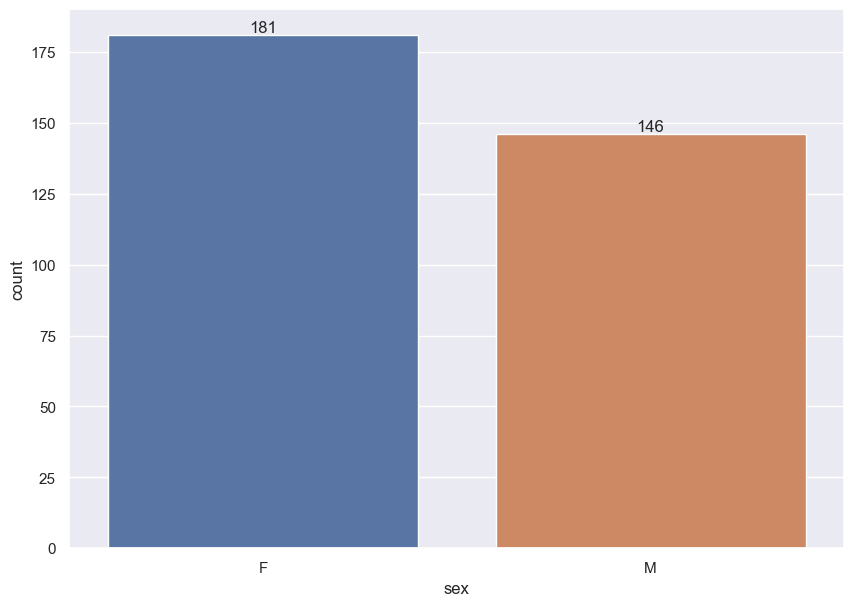

In [23]:
ax = sns.countplot(x='sex', data=df)
ax.bar_label(ax.containers[0])

<AxesSubplot:ylabel='description'>

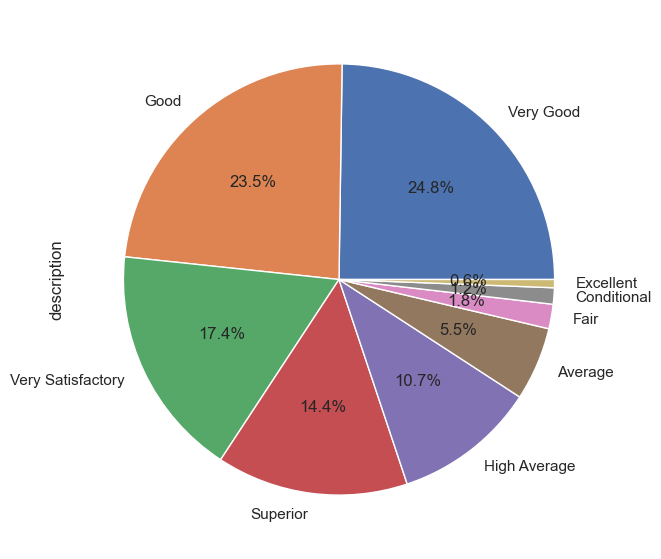

In [24]:
def description(desc):
    if desc >= 1.00 and desc <=1.24 :
         return "Excellent"
        
    if desc >= 1.25 and desc <=1.4904 :
         return "Superior"
        
    if desc >= 1.50 and desc <= 1.7404:
         return "Very Good"
        
    if desc >= 1.75 and desc <= 1.99 :
         return "Good"
        
    if desc >= 2.00 and desc <= 2.2404 :
         return "Very Satisfactory"
        
    if desc >= 2.25 and desc <= 2.49 :
         return "High Average"
        
    if desc >= 2.50 and desc <= 2.74 :
         return "Average"
        
    if desc >= 2.75 and desc <= 2.99 :
         return "Fair"
        
    if desc >= 3.00 and desc <= 3.99 :
         return "Pass"
        
    if desc >= 4.00 and desc <= 4.99  :
         return "Conditional"
        
    if desc >= 5.00  and desc <= 5.99:
         return "Fail"

df["description"] = df["GPA"].apply(description)

df["description"].value_counts().plot(kind="pie", autopct='%1.1f%%')

Based on the WMSU metric for grading system, in the case of the samnple population majority of the students got1.50 and <= 1.7404 GPA categorized by "Very Good" description, followed by category of "Good" and "Very Satisfactory". yet there low number of student got an "Excellent" GPA ranging between  1.00 and <=1.24.

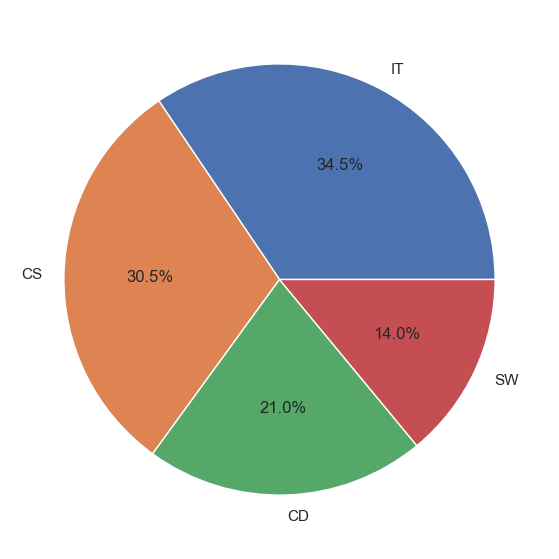

In [25]:
from matplotlib.pyplot import pie, show
course = ["IT", "CS", "CD", "SW"]
count = [123, 109, 75, 50]
courses = df["course"].value_counts()
plt.pie(count, labels=course, autopct='%1.1f%%')
show() 

To dissect even further in term of courses.The most populated garnered data in term of courses was coming from IT with a number population of 123, followed  by the CS with 109 students, and CD with 75 and least was SW with 50 only 50 count data.

Text(0, 0.5, 'Count')

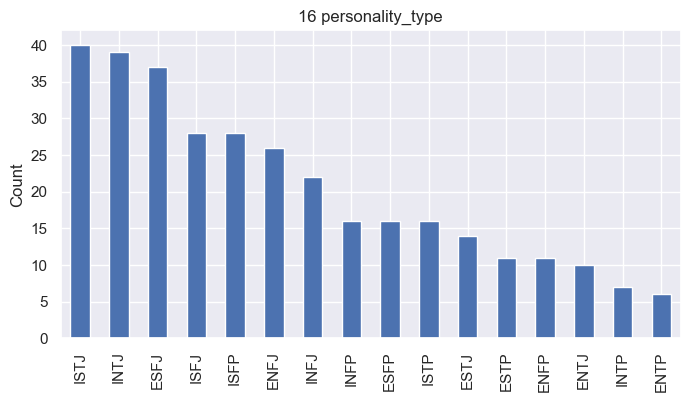

In [26]:
#count 'sex' column ing pie chart
df["personality_type"].value_counts()[:].plot(kind='bar', title='16 personality_type', figsize=(8,4)).set_ylabel("Count")

Most of the students for irregardless of program that they are in, the ISTJ type of personality garnered the most number, followed by the INTJ students.

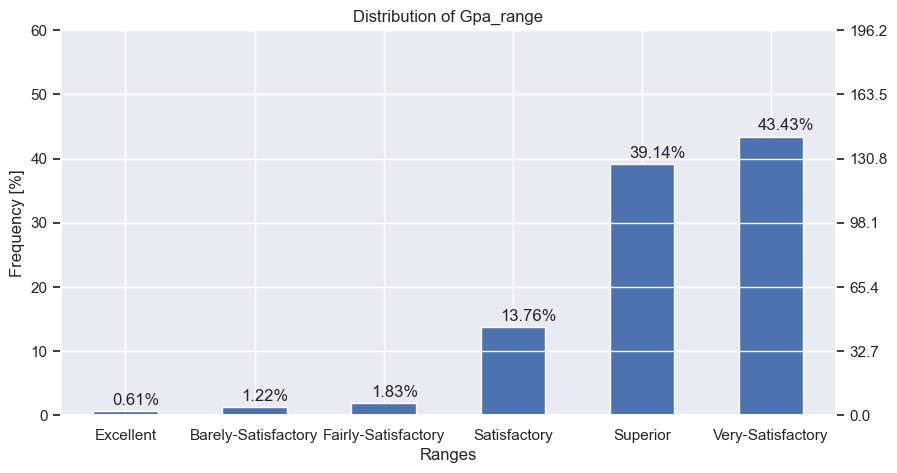

In [27]:
plt.figure(figsize=(10,5))
ax = (df.gpa_range.value_counts()/len(df)*100).sort_values().plot(kind="bar", rot=0)
plt.title('Distribution of Gpa_range')
plt.xlabel('Ranges')
plt.ylabel('Frequency [%]')

ax.set_yticks(np.arange(0, 70, 10))
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 70, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Distribution of gpa_range the majority of the sample population is having Very-Satifactory range nd its 43.27% of sample population, followed by the superior range with 39.18%, and sstisfactory rnge ith 14.04%, 1.75% with fairly-satisfactory, 1.17% with barely-satisfactory, and the least data garnered is coming from excellent range with 0.58% of the sample population.

Text(0.5, 0, 'Count')

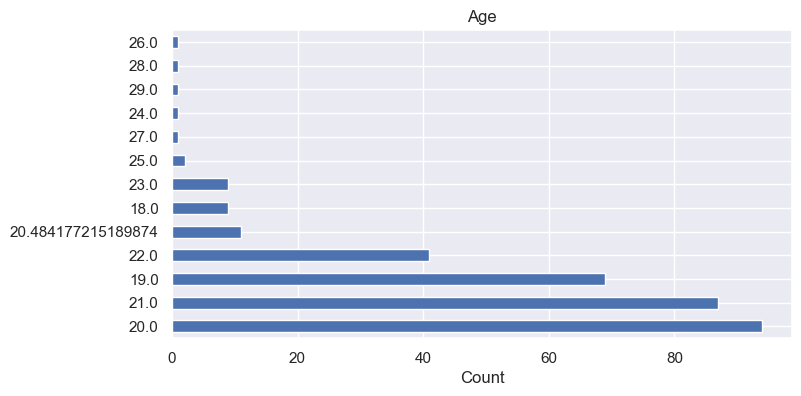

In [28]:
#count 'sex' column ing pie chart
df["age"].value_counts()[:].plot(kind='barh', title='Age', figsize=(8,4)).set_xlabel("Count")

Most of the participants in the study are 20 years old, specifically 19-21-22 years old.

In [29]:
#Count of each sex with family_support
import plotly.express as px

PersonalityPopu = df.groupby('scholar')[["fam_support"]].value_counts()
#PersonalityPopu.plot(kind='pie', colormap='jet')

#names = ["FEMALE, Yes", "FEMALE, No", "MALE, Yes", "MALE, No"]
fig = px.pie(df, values=PersonalityPopu, title="COUNT MALE & FEMALE WITH FAMILY")
fig.show()

96.36% of the sample population are reliant on their family support. However, 3.64% are "not" supported by their family, they provide their own.

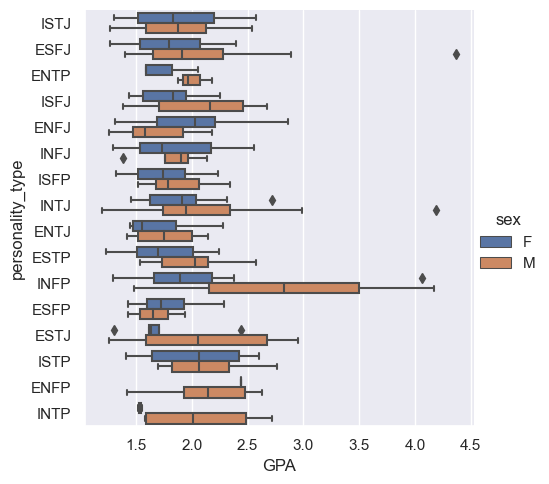

In [30]:
sns.catplot(
    data=df, x="GPA", y="personality_type", hue="sex",
    kind="box", dodge=True,
)

Male students tends to get lower GPA compare to female. 

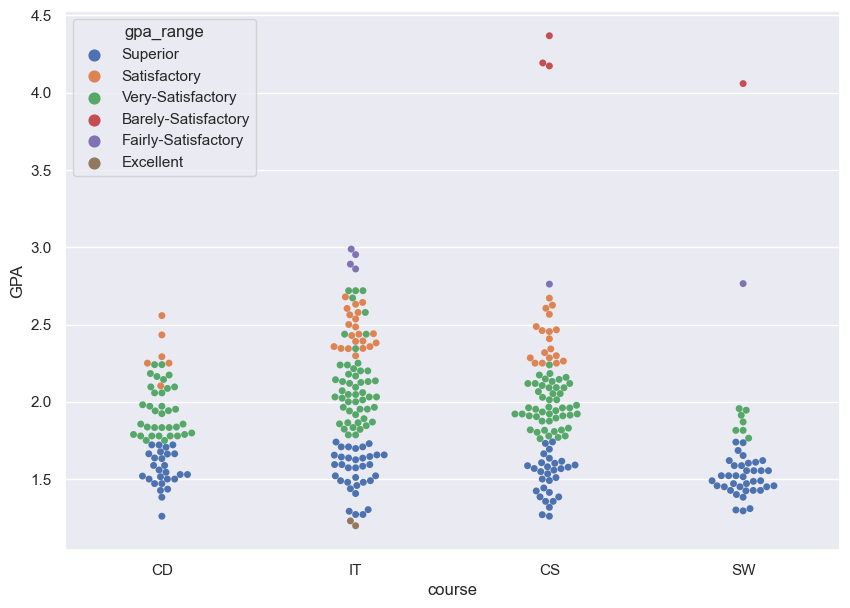

In [31]:
ax = sns.swarmplot(data=df, x="course", y="GPA", hue="gpa_range")

### PLOT TIME MANAGEMENT FOR PERSONALITY TYPE

In [32]:
#create dataframe for demographics
newDEMOinfo = df.iloc[:, [0,1,2,3,4,5,9]]

#create dummy to all tri-features
timeManagement_TM = pd.get_dummies(df.iloc[:,10:17])
classAttendancePartcipation_CAP = pd.get_dummies(df.iloc[:,17:21])

#tri-dataframes
DEMOandTM_DF = pd.concat([newDEMOinfo, timeManagement_TM], axis=1)
DEMOandCAP_DF = pd.concat([newDEMOinfo, classAttendancePartcipation_CAP], axis=1)

In [33]:
#create pivo_tabel for each tri-features for plotting
pivot_tm1_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM1_always", "TM1_sometimes","TM1_never"] , index="personality_type", aggfunc='sum')

pivot_tm2_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM2_always", "TM2_sometimes","TM2_never"] , index="personality_type", aggfunc='sum')

pivot_tm3_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM3_always", "TM3_sometimes","TM3_never"] , index="personality_type", aggfunc='sum')

pivot_tm4_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM4_always", "TM4_sometimes","TM4_never"] , index="personality_type", aggfunc='sum')

pivot_tm5_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM5_always", "TM5_sometimes","TM5_never"] , index="personality_type", aggfunc='sum')

pivot_tm6_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM6_always", "TM6_sometimes","TM6_never"] , index="personality_type", aggfunc='sum')

pivot_tm7_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM7_always", "TM7_sometimes","TM7_never"] , index="personality_type", aggfunc='sum')

Text(0.5, 1.0, 'Statement [TM1] : I have a study schedule with times set aside to study each subject')

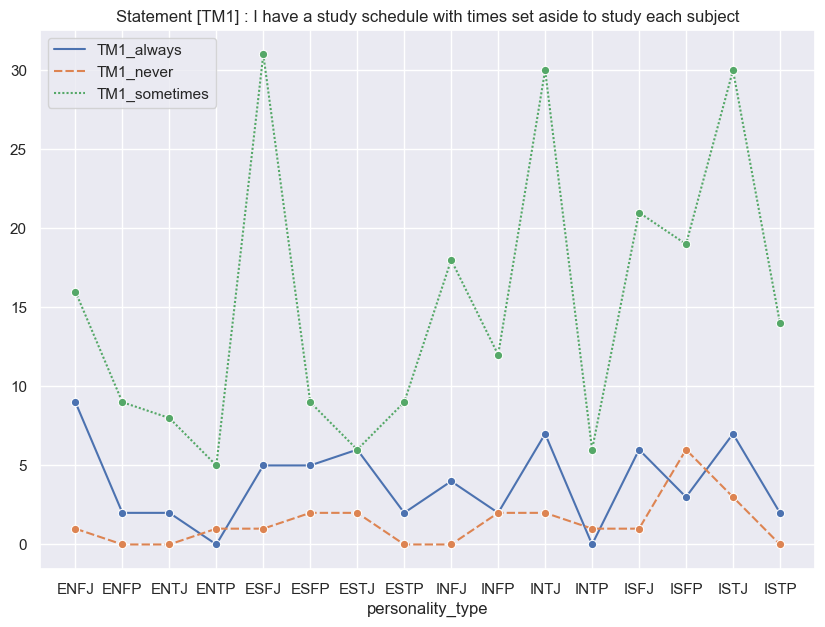

In [34]:
sns.lineplot(data=pivot_tm1_freq,
             marker="o").set_title("Statement [TM1] : I have a study schedule with times set aside to study each subject")

INTERPRETATION:
       
Most dominant personality type that "ALWAYS" scheduled their study time to settle each subjects are ENFJ, INTJ and ISTJ. As opposed to personality type who 'NEVER' clear up a time to study their respective subjects is ISFP. ESFJ, and as well  as, INTJ and ISTJ personality "SOMETIMES" had a time to to settle things. Most of the personality type has answered "SOMETIMES".Hence, students regardless of personality type has a hard time to schedule study time perhaps due to other factors.

Text(0.5, 1.0, 'Statement [TM2] : I use my free time between classes for reading or reviewing')

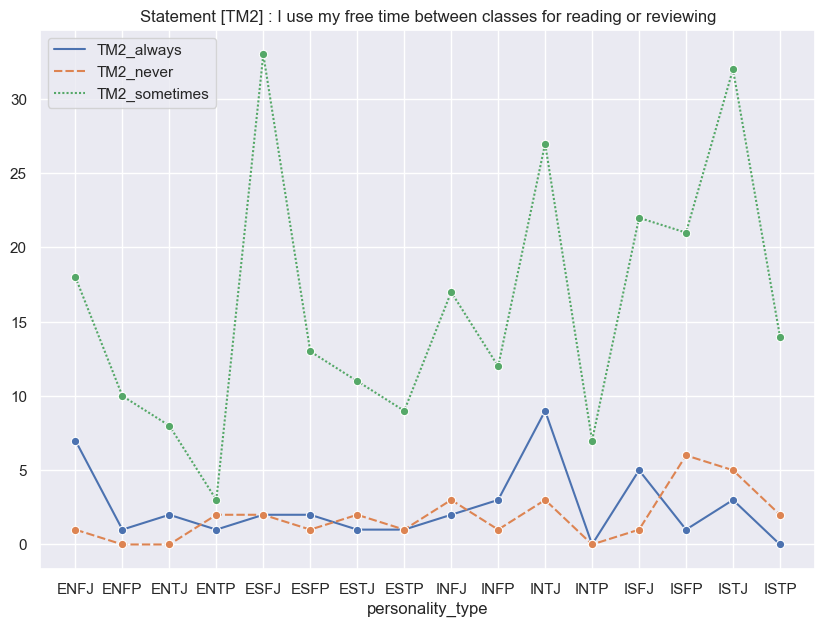

In [35]:
sns.lineplot(data=pivot_tm2_freq,
             marker="o").set_title("Statement [TM2] : I use my free time between classes for reading or reviewing")

 INTERPRETATION: 
      
All personality type are in below average in term of answering "ALWAYS". However, personality types such as ESFJ, INTJ, ISFJ, ISFP and ISTJ. Tends to use their free time for reveiwing and reading. 

Text(0.5, 1.0, 'Statement [TM3] : I balance my study time with recreation and leisure time')

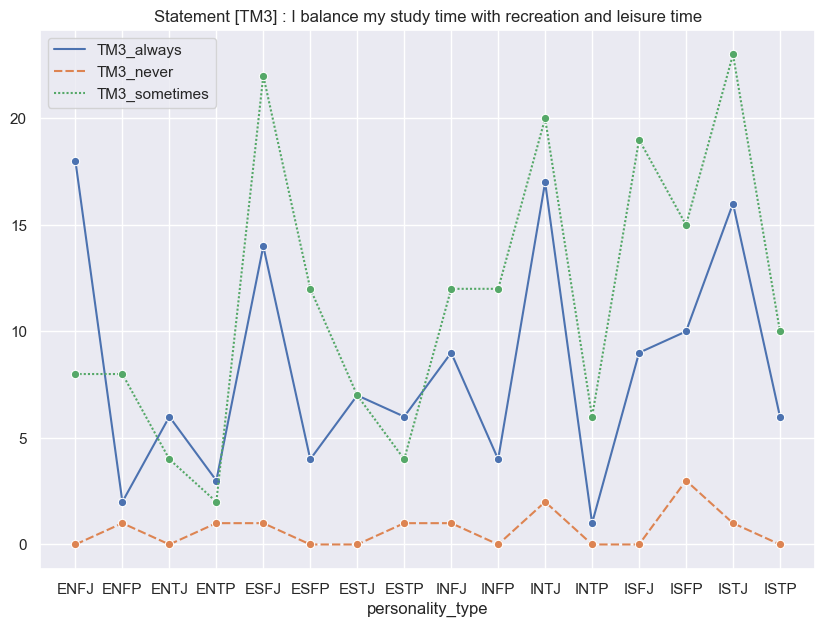

In [36]:
sns.lineplot(data=pivot_tm3_freq,
             marker="o").set_title("Statement [TM3] : I balance my study time with recreation and leisure time")

INTERPRETATION: 

ENFJ personality have a higher tendecy of balacning their academic matter and recreational activity. Additionally, ESFJ students are sometimes inclined to it along with INTJ, ESFJ, ISFJ, ISTJ.

Text(0.5, 1.0, "Statement [TM4] : I have a calendar of the semester and it's marked with the exam dates, project due dates and assignments")

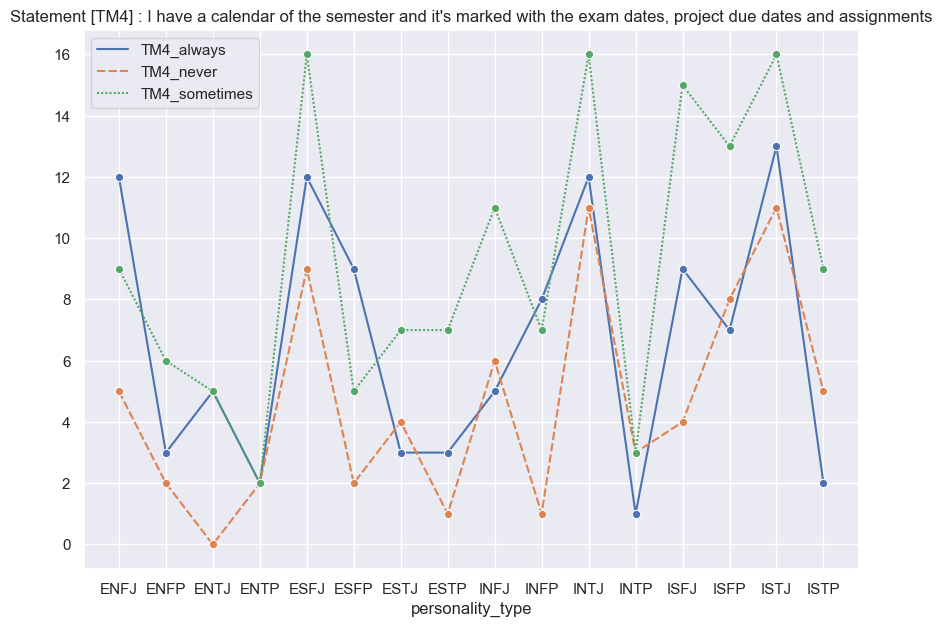

In [37]:
sns.lineplot(data=pivot_tm4_freq, 
             marker="o").set_title("Statement [TM4] : I have a calendar of the semester and it's marked with the exam dates, project due dates and assignments")

INTERPRETATION: 

Most of the personality types settled their calendar dates and marked their academic tasks. however, given the number sample for ENTP they have equal number of frequency that corresponds with the statement. Due to low number of 'always' for INTP it can be ragarded that they dont have the time to mark dates of any types of academic activity.

Text(0.5, 1.0, 'Statement [TM5] : I keep weekly schedule of classes and activities')

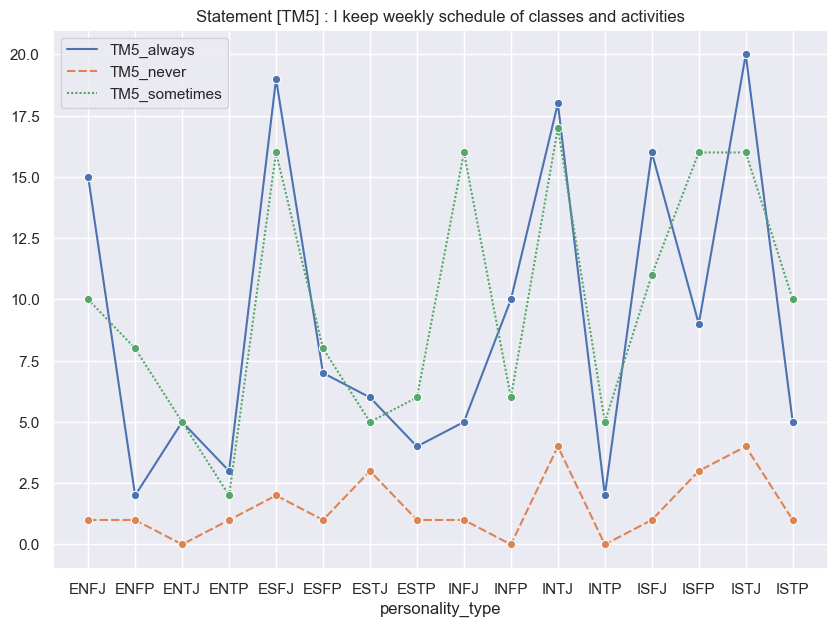

In [38]:
sns.lineplot(data=pivot_tm5_freq,
             marker="o").set_title("Statement [TM5] : I keep weekly schedule of classes and activities")

INTERPRETATION:
        
All personality types are having a weekly schedule to keep track their day-to-day classes and activities. 

Text(0.5, 1.0, 'Statement [TM6] : I use daily to do lists')

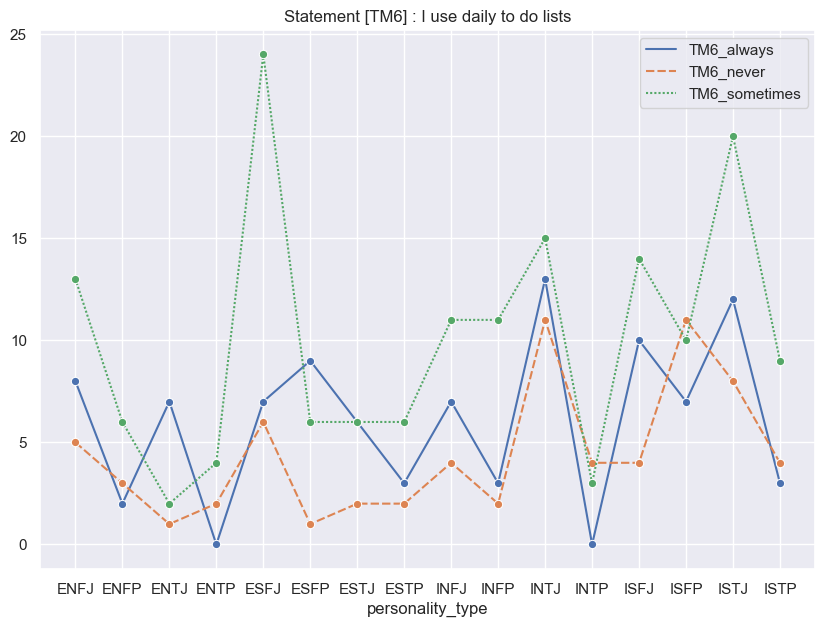

In [39]:
sns.lineplot(data=pivot_tm6_freq,
             marker="o").set_title("Statement [TM6] : I use daily to do lists")

INTERPRETATION:
        
Most of the ISFP personality type's students don't use to do list. On the other hand, majority of ENTJ had a to do list, and among the personality type it is the only type that excedes number in terms of always, regardless of its sample popualtion

Text(0.5, 1.0, 'Statement [TM7] : I study on the weekends')

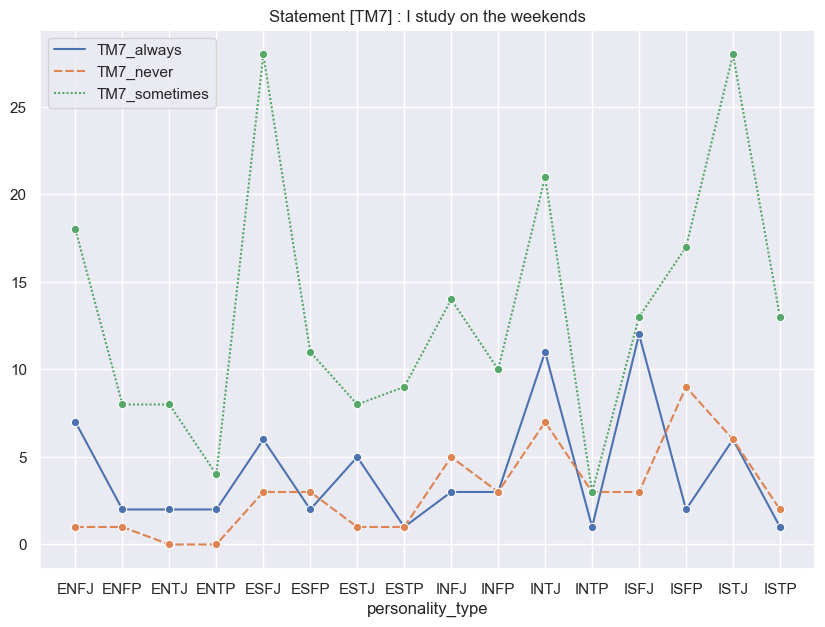

In [40]:
sns.lineplot(data=pivot_tm7_freq, 
             marker="o").set_title("Statement [TM7] : I study on the weekends")

INTERPRETATION
        
Regardless of persoanlity type students 'sometimes' studies on the weekends. ESFP, INFJ, ISFP and ISTP had a most     frequency of 'never' and being raise as the 2nd most number in respect of their population. In contrary, ISFJ type has a great number of always in terms of all types. stating that these type of personality had an effort of studying at the end of the weekends. 

----

#### Does Sample Population is Positively Consistent in their Class Attendance and Participation

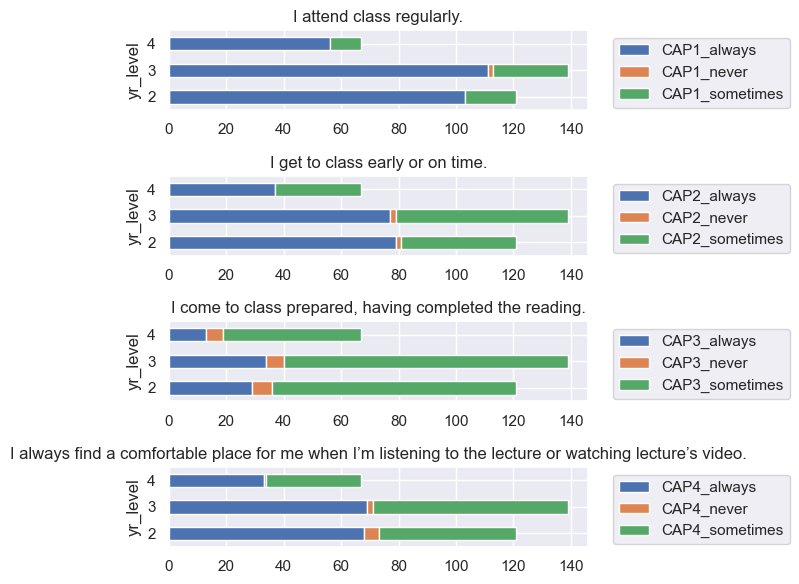

In [41]:
#create pivot_tabel for each tri-features for plotting
pivot_cap1_freq = pd.pivot_table(
    DEMOandCAP_DF, values=['CAP1_always','CAP1_never','CAP1_sometimes'] , index="yr_level", aggfunc='sum')
pivot_cap2_freq = pd.pivot_table(
    DEMOandCAP_DF, values=['CAP2_always','CAP2_never','CAP2_sometimes'] , index="yr_level", aggfunc='sum')
pivot_cap3_freq = pd.pivot_table(
    DEMOandCAP_DF, values=['CAP3_always','CAP3_never','CAP3_sometimes'] , index="yr_level", aggfunc='sum')
pivot_cap4_freq = pd.pivot_table(
    DEMOandCAP_DF, values=['CAP4_always','CAP4_never','CAP4_sometimes'] , index="yr_level", aggfunc='sum')

#Create stacked plot
fig, ax  = plt.subplots(4, 1)

pivot_cap1_freq.plot(ax=ax[0], kind="barh",title='I attend class regularly.',
                     figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_cap2_freq.plot(ax=ax[1], kind="barh",title='I get to class early or on time.',
                     figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_cap3_freq.plot(ax=ax[2], kind="barh",title='I come to class prepared, having completed the reading.',
                     figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))
pivot_cap4_freq.plot(ax=ax[3],kind="barh",title='I always find a comfortable place for me when I’m listening to the lecture or watching lecture’s video.',
                     figsize=(8,6), stacked=True).legend(bbox_to_anchor=(1.5, 1))

plt.tight_layout()

INTERPRETATION
               
All year levels particularly 2nd, 3rd and 4th level combined of two department namely College of Computer Science and College of Social Work and Community Development answered the following statement above.
                
   statement 01 : Majority of their of their population of ech year level attended their classes regularly.
               
   statement 02 : There are some students struggles to get to classs early these are students who answered 'sometimes' and 'never' taht is 40% os the sample population. This number of people is seeming competing with the total number of students who answered otherwise. This could be a note to spark a dialouge on what cause them to be unresponsive towards time.
               
   statement 03 : 70% of the sample population answered 'sometimes' enters the room unprepared. We can assume that the statement 02 is one of the factors due to this existing case.
               
   statement 04 : 52% of the sample population they always find a comfortable place for them listen to their lecture's video or virtual classes. However, 47% answered combined with sometimes and ever has aa difficulty to have a comfortable and convinient for them to focus on their academics. Since all of the sample population are not priviledge to a have good socio-economic status. We can assume that there is certain external factors that tends  to hinder their focus.

---

#### Most Used Device of the Sample Population

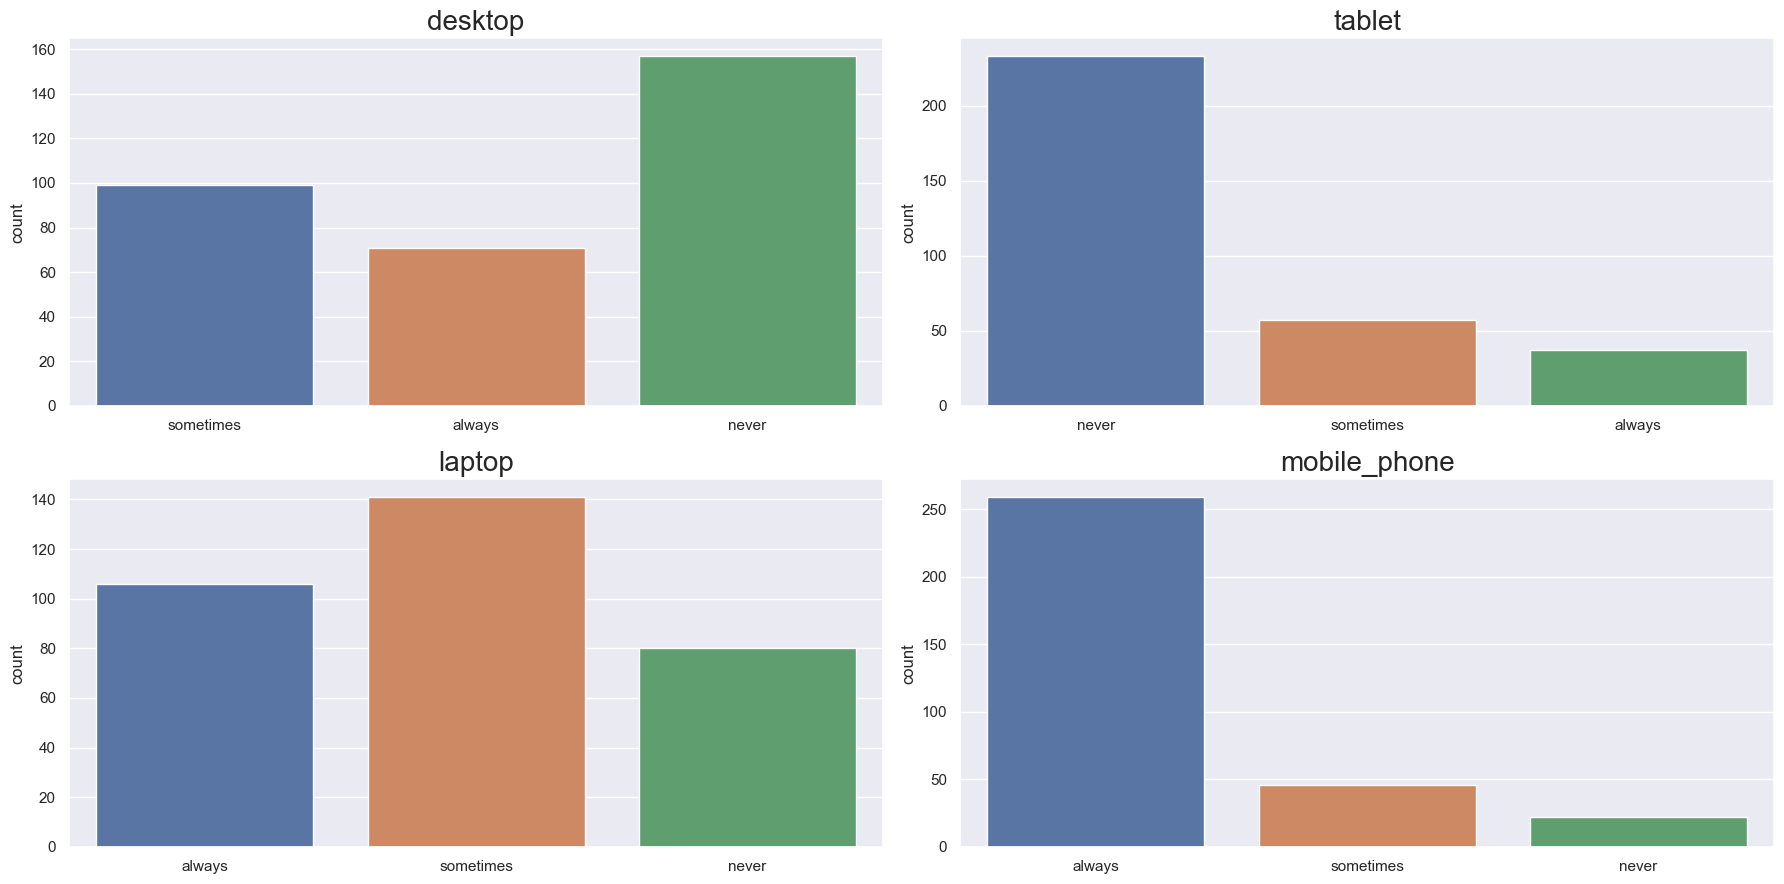

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(18,9))
sns.countplot(data=df, x="desktop", ax=ax[0,0]).set(xlabel=None)
sns.countplot(data=df, x="laptop", ax=ax[1,0]).set(xlabel=None)
sns.countplot(data=df, x="mobile_phone", ax=ax[1,1]).set(xlabel=None)
sns.countplot(data=df, x="tablet", ax=ax[0,1]).set(xlabel=None)

ax[0,0].set_title("desktop", fontsize = 20)
ax[1,0].set_title("laptop", fontsize = 20)
ax[1,1].set_title("mobile_phone", fontsize = 20)
ax[0,1].set_title("tablet", fontsize = 20)

plt.tight_layout()

INTERPRETATION

According to the Sample Population the most convenient device that they use most of the time is the mobile phone, followed by laptop, desktop and tablet. 

-----

#### Does Exam Preparation is effective in getting Good grades

Text(0.5, 1.0, 'I make up exam questions using the same format that the actual exam will use.')

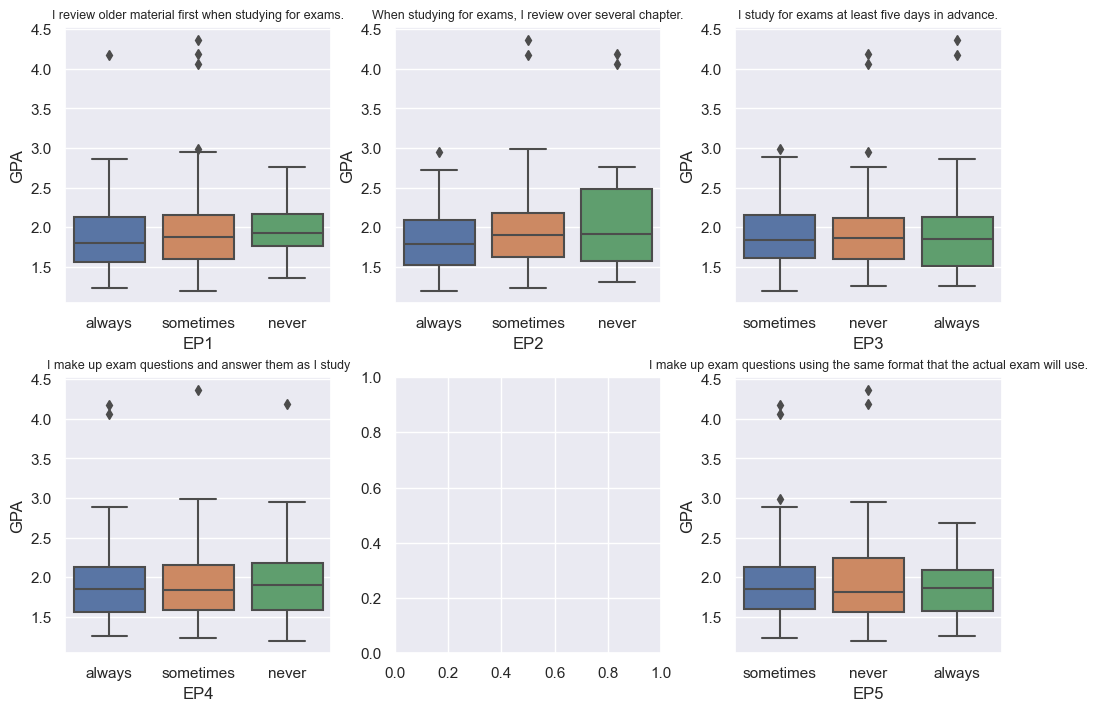

In [43]:
fig, axes = plt.subplots(2, 3, constrained_layout=True)
sns.boxplot(data=df, x="EP1", y="GPA", ax=axes[0,0]).set_title("I review older material first when studying for exams.", fontsize=9)
sns.boxplot(data=df, x="EP2", y="GPA", ax=axes[0,1]).set_title("When studying for exams, I review over several chapter.", fontsize=9)
sns.boxplot(data=df, x="EP3", y="GPA", ax=axes[0,-1]).set_title("I study for exams at least five days in advance.", fontsize=9)
sns.boxplot(data=df, x="EP4", y="GPA", ax=axes[1,0]).set_title("I make up exam questions and answer them as I study", fontsize=9)
sns.boxplot(data=df, x="EP5", y="GPA", ax=axes[-1,-1]).set_title("I make up exam questions using the same format that the actual exam will use.", fontsize=9)

Interpretation
           
Average Sample Population is somehow consistent within the range if 2.00 and 1.00 flat. And studies' sample population who answered "Always" in respect to the questions, has a great chance of getting a high grade near 1 flat. Therefore, Students who does the following activities is mostly inclined in getting a good or better grades.

-----

#### As Year Level increases GPA also increases.

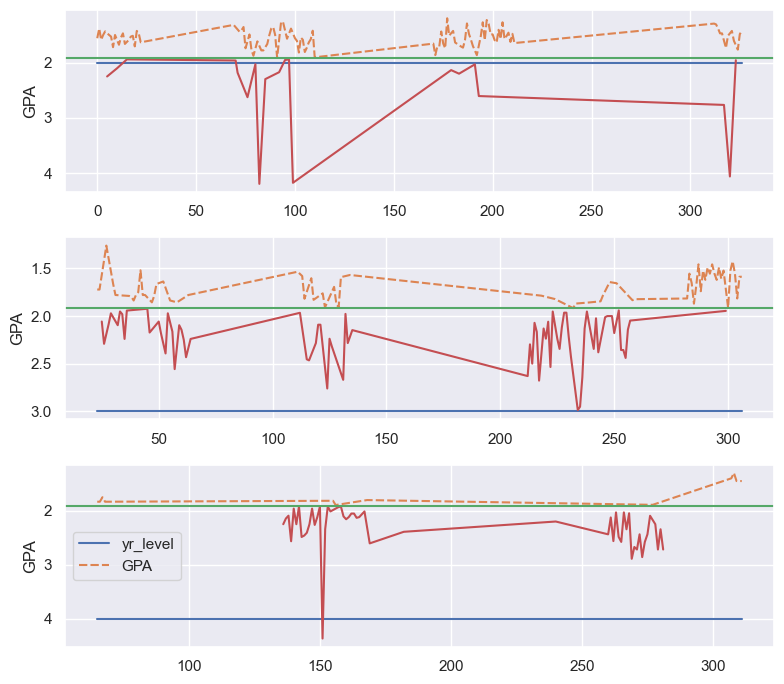

In [44]:
store_gpaAndYrLevel= newDF.iloc[:, [4,49]]
store_aboveAve_Yr2 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==2) 
                                         & (store_gpaAndYrLevel["GPA"] <= store_gpaAndYrLevel["GPA"].mean())]
store_belowAve_Yr2 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==2) 
                                         & (store_gpaAndYrLevel["GPA"] >= store_gpaAndYrLevel["GPA"].mean())]

store_aboveAve_Yr3 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==3) 
                                         & (store_gpaAndYrLevel["GPA"] <= store_gpaAndYrLevel["GPA"].mean())]
store_belowAve_Yr3 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==3) 
                                         & (store_gpaAndYrLevel["GPA"] >= store_gpaAndYrLevel["GPA"].mean())]

store_aboveAve_Yr4 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==4)
                                         & (store_gpaAndYrLevel["GPA"] <= store_gpaAndYrLevel["GPA"].mean())]
store_belowAve_Yr4 = store_gpaAndYrLevel[(store_gpaAndYrLevel["yr_level"]==4) 
                                         & (store_gpaAndYrLevel["GPA"] >= store_gpaAndYrLevel["GPA"].mean())]

#create plotting
fig, axes = plt.subplots(3,1, figsize=(8,7))

sns.lineplot(ax = axes[0], data=store_aboveAve_Yr2, legend=None).invert_yaxis()
sns.lineplot(ax = axes[0], data=store_belowAve_Yr2["GPA"], color='r')
sns.lineplot(ax = axes[1], data=store_aboveAve_Yr3,legend=None).invert_yaxis()
sns.lineplot(ax = axes[1], data=store_belowAve_Yr3["GPA"], color='r')
sns.lineplot(ax = axes[2], data=store_aboveAve_Yr4).invert_yaxis()
sns.lineplot(ax = axes[2], data=store_belowAve_Yr4["GPA"], color='r')

axes[0].axhline(store_gpaAndYrLevel["GPA"].mean(), color='g')
axes[1].axhline(store_gpaAndYrLevel["GPA"].mean(), color='g')
axes[2].axhline(store_gpaAndYrLevel["GPA"].mean(), color='g')



plt.tight_layout()
plt.legend()
plt.show()

INTERPRETATION
          
There is dramatically declined of student who had an above average GPA, the illustration shows as the year level adds up THE GPA decreases.

---

#### Comparison between College

In [45]:
df_col = newDF[[ 'age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
              'personality_type', 'working_stud', 'scholar', 
              'TM3', 'TM4', 'TM5','TM6', 'TM7', 
              'CAP2', 'CAP3', 'CAP4', 
              'GSS2', 'GSS3', 'GSS4', 'GSS6', 'GSS7', 
              'EP1', 'EP2', 'EP3', 'EP5', 
              'NT1', 'NT2', 'NT3', 
              'desktop', 'laptop', 'mobile_phone', 'tablet', 
              'wifi', 'cellular_data',
              'high_speed', 'light_speed', 
              'GPA', 
              'gpa_range']]

<AxesSubplot:ylabel='college'>

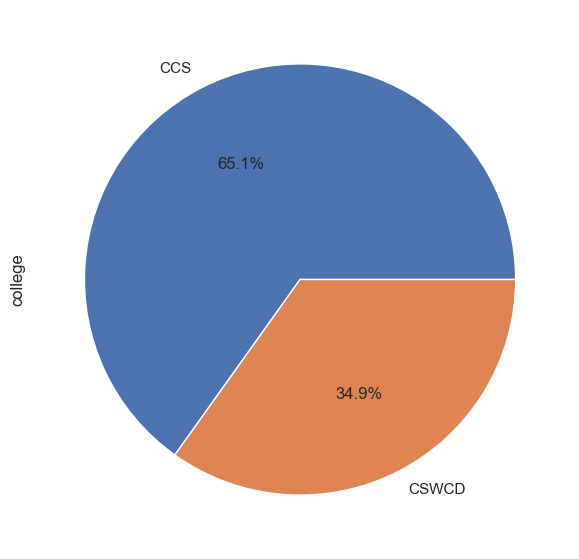

In [46]:
from matplotlib.pyplot import pie, show
def college(x):
    if x == "IT":
         return "CCS"
        
    elif  x=="CS":
        return "CCS"
    
    elif x == "SW":
        return "CSWCD"
    
    elif x=="CD":
        return "CSWCD"
    
df["college"] = df["course"].apply(college)
df["college"].value_counts().plot(kind="pie",  autopct='%1.1f%%')

the researhers gathered 65.2% of the sample population coming from CCS. And 34.8% from CSWCD.
this gave us a clear vision that there is a clear unbalance distribution for each college. however, since the study used a convenience sampling techniques, that should not be the case. Nevertheless, it can affect the generalization of interpretation.

college  yr_level  No. students
0     CCS         2            82
1     CCS         3            73
2     CCS         4            58
3   CSWCD         3            66
4   CSWCD         2            39
5   CSWCD         4             9

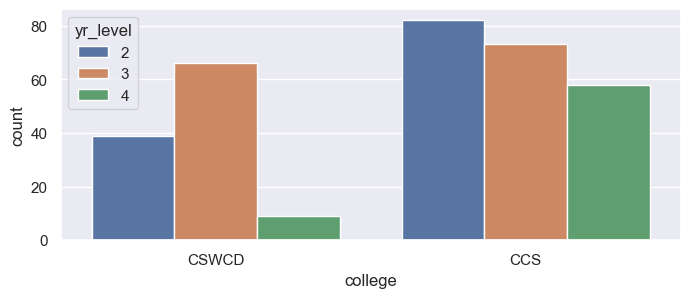

In [47]:
fig = plt.subplots(figsize=(8,3))
sns.countplot(data=df, x="college", hue="yr_level")
df.groupby(["college"])["yr_level"].value_counts().reset_index(name='No. students')

majority of the sample i the college of socia work and community development in their respecetive year levels
the most garnered data are coming from year level 3 with, 69 in total. And the least collected under the of CSWCD 
is the year level 4 with 10 participants only. It clearly shows what particular level outnumbered the other,
collected in regards with their colleges.

In [48]:
df["college"].value_counts()

CCS      213
CSWCD    114
Name: college, dtype: int64

In [49]:
"""
    The CCS year-level population will be randomly selected for comparison.
    Given the sample population of 2nd, 3rd, and 4th year levels for each college,
    Since the sample population of the CCS college outnumbered the sample population of the CSWCD,
    Researchers decided to equalize the number for each year level.
    by doing sample randomization for each year level, corresponding to the number of samples
    population CSWCD year levels
"""

Year2ndCCS_sample = df.sample(n=40, random_state=42, axis='index')
Year3rdCCS_sample = df.sample(n=69, random_state=42, axis='index')
Year4thCCS_sample = df.sample(n=10, random_state=42, axis='index')

#sample size to 
CCS_sample = df[df["college"] == "CCS"].sample(n=114, random_state=42, axis='index')
CSWCD_sample = df[df["college"] == "CSWCD"].sample(n=114, random_state=42, axis='index')

2ND year CCS :  (40, 53)
2ND year CSWCD :  (39, 3)
3RD year CCS :  (69, 53)
3RD year CSWCD :  (66, 3)
4TH year CCS :  (10, 53)
4TH year CSWCD :  (9, 3)


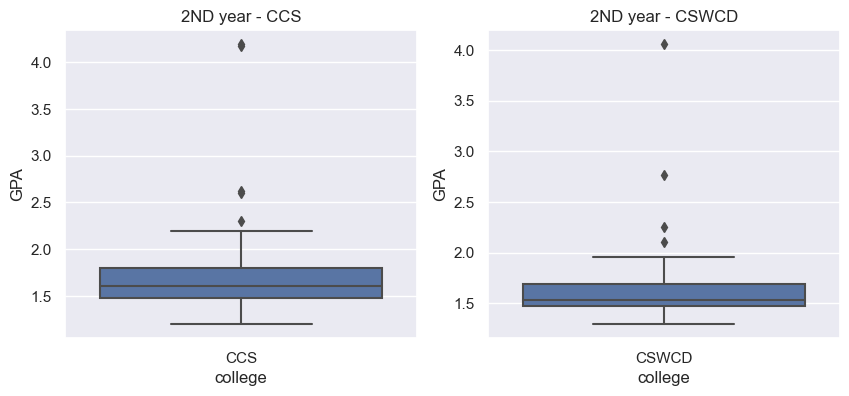

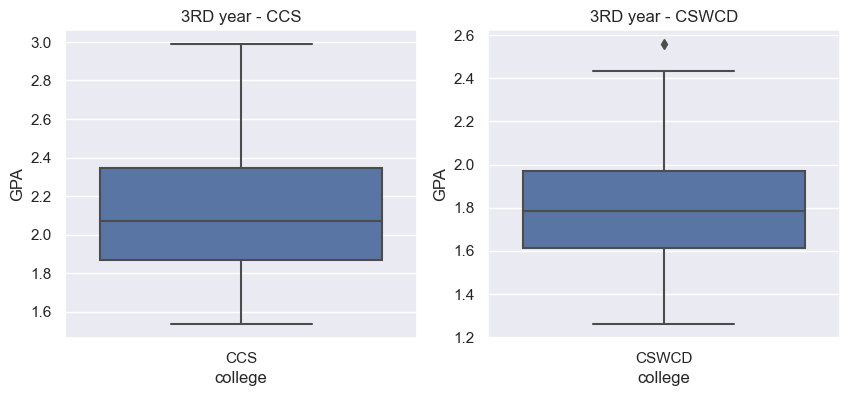

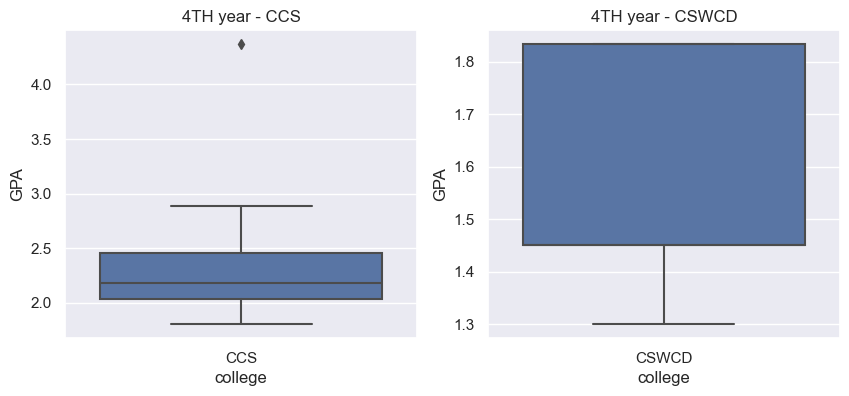

In [50]:
select_col = pd.DataFrame(df, columns = ["college","yr_level", "GPA"])

# CCS - Year_levels
CCS = ['CCS']
CCS_2nd = [2]
CCS_3rd = [3]
CCS_4th = [4]

# CSWCD - Year_levels
CSWCD = ['CSWCD']
CSWCD_2nd = [2]
CSWCD_3rd = [3]
CSWCD_4th = [4]


#dataframe CCS 2nd year 
CCS_2ndStud = select_col.loc[(select_col["college"].isin(CCS)) & (select_col["yr_level"].isin(CCS_2nd))]
#dataframe CCS 3rd year 
CCS_3rdStud = select_col.loc[(select_col["college"].isin(CCS)) & (select_col["yr_level"].isin(CCS_3rd))]
#dataframe CCS 2nd year 
CCS_4thStud = select_col.loc[(select_col["college"].isin(CCS)) & (select_col["yr_level"].isin(CCS_4th))]


#dataframe CSWCD 2nd year 
CSWCD_2ndStud = select_col.loc[(select_col["college"].isin(CSWCD)) & (select_col["yr_level"].isin(CSWCD_2nd))]
#dataframe CSWCD 3rd year 
CSWCD_3rdStud = select_col.loc[(select_col["college"].isin(CSWCD)) & (select_col["yr_level"].isin(CSWCD_3rd))]
#dataframe CSWCD 4th year 
CSWCD_4thStud = select_col.loc[(select_col["college"].isin(CSWCD)) & (select_col["yr_level"].isin(CSWCD_4th))]


fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=CCS_2ndStud, x="college", y="GPA", ax=axes[0]).set_title("2ND year - CCS")
sns.boxplot(data=CSWCD_2ndStud, x="college", y="GPA", ax=axes[1]).set_title("2ND year - CSWCD")

print("2ND year CCS : ", Year2ndCCS_sample.shape)
print("2ND year CSWCD : ",CSWCD_2ndStud.shape)


fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=CCS_3rdStud, x="college", y="GPA", ax=axes[0]).set_title("3RD year - CCS")
sns.boxplot(data=CSWCD_3rdStud, x="college", y="GPA", ax=axes[1]).set_title("3RD year - CSWCD")

print("3RD year CCS : ", Year3rdCCS_sample.shape)
print("3RD year CSWCD : ",CSWCD_3rdStud.shape)

fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=CCS_4thStud, x="college", y="GPA", ax=axes[0]).set_title("4TH year - CCS")
sns.boxplot(data=CSWCD_4thStud, x="college", y="GPA", ax=axes[1]).set_title("4TH year - CSWCD")

print("4TH year CCS : ", Year4thCCS_sample.shape)
print("4TH year CSWCD : ",CSWCD_4thStud.shape)

<AxesSubplot:ylabel='GPA'>

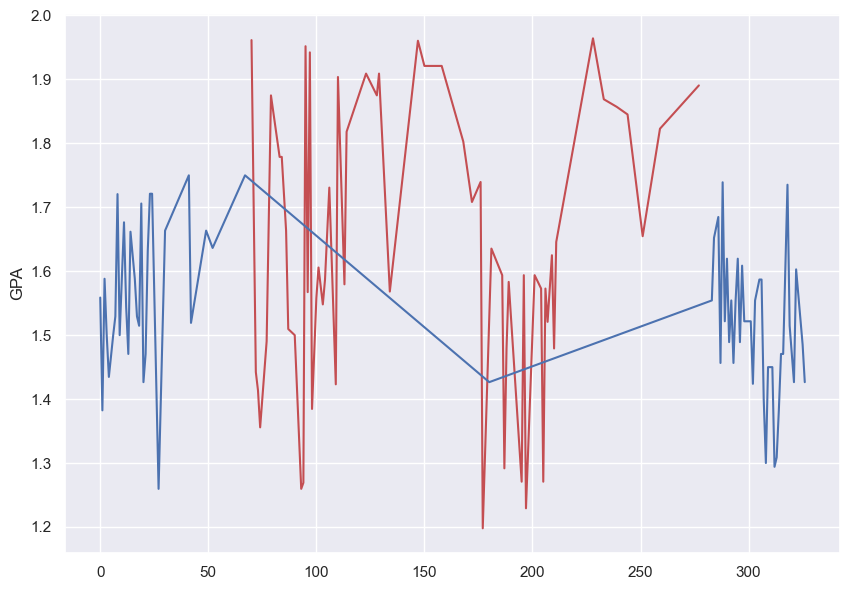

In [51]:
store_aboveAve_CCS = CCS_sample[(CCS_sample["college"]=="CCS") 
                                         & (CCS_sample["GPA"] <= CCS_sample["GPA"].mean())]

store_aboveAve_CSWCD = CSWCD_sample[(CSWCD_sample["college"]=="CSWCD") 
                                         & (CSWCD_sample["GPA"] <= CSWCD_sample["GPA"].mean())]

sns.lineplot(data=store_aboveAve_CCS["GPA"],  color='r')
sns.lineplot(data=store_aboveAve_CSWCD["GPA"],color='b')

majority student of college of social work and community development got GPA clsoer to 1 flat compares to the coolege of computer studies. shockingly the 4th student of CSWCD sytudent GPA got atleast 2.0 GPA.

----

-----

# Checking Outliers

[Text(0.5, 1.0, 'Outliers of StudInfo_DF')]

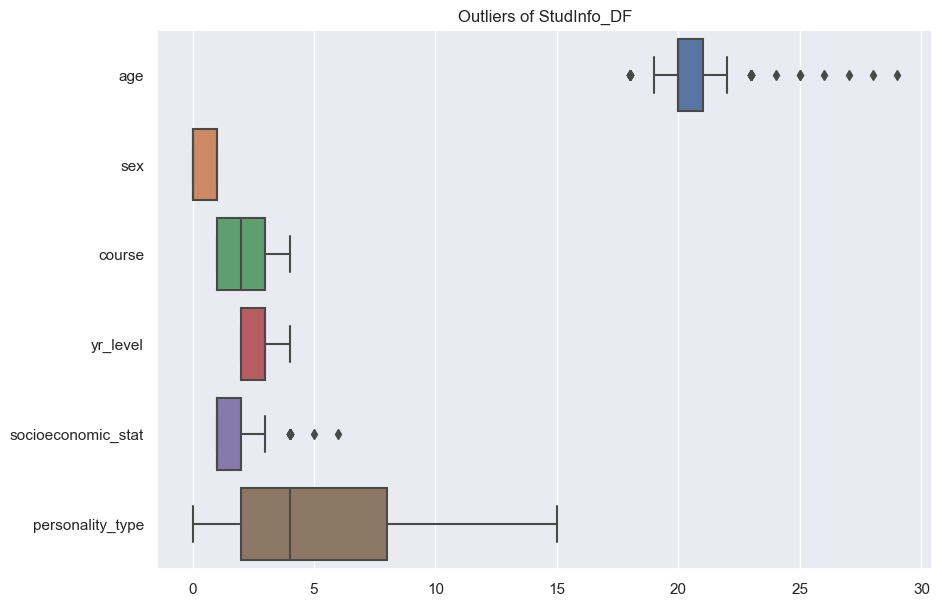

In [52]:
sns.boxplot(data=StudInfo_DF, orient = "h").set(title="Outliers of StudInfo_DF")

the newly created dataframe concatinated with different column, StudInfo_DF. it shows that exist an outliers  for the age and socio-economic status column. The researhers would like to remain as is, and continue the process with these outliers.


[Text(0.5, 1.0, 'Box Plot of GPA')]

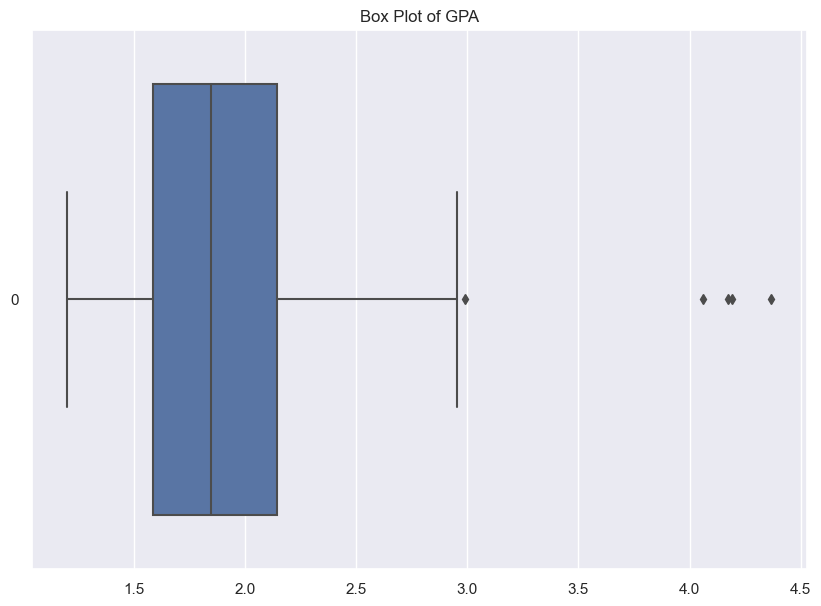

In [53]:
sns.boxplot(data=newDF.iloc[:,49], orient = "h").set(title="Box Plot of GPA")

the average range for gpa in the sample population is within 1.5 and 2.0 and it extends to the maximum of 3.0  GPA. though, we have stil garnered student who got lower gpa within 4.0 to 4.5 gp. The reseacrhe, would like to work with these outliers. the sole purpose of thi retention of outlier is that study should variation and representation for population.

[Text(0.5, 1.0, 'Box Plot of Tri-Features')]

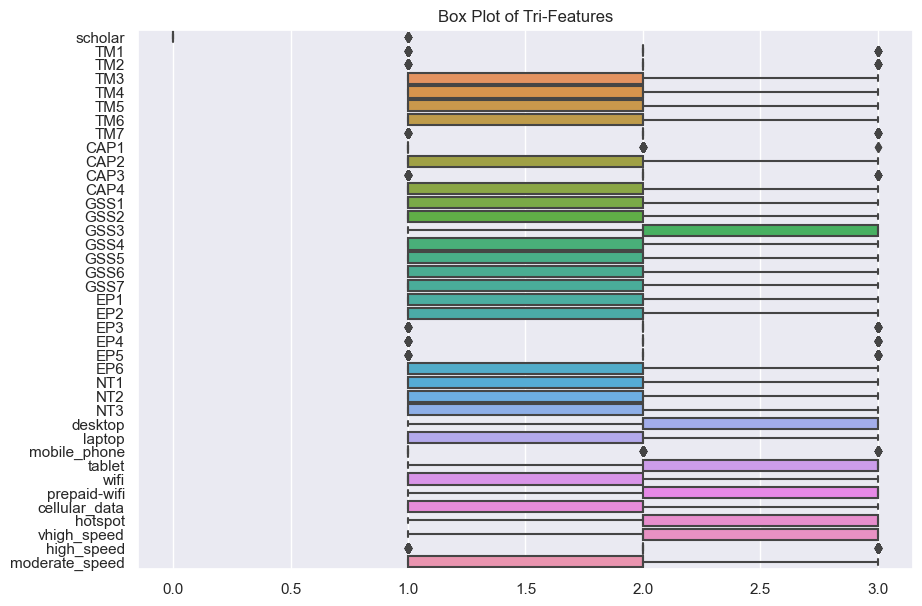

In [54]:
sns.boxplot(data=newDF.iloc[:,9:48], orient = "h").set(title="Box Plot of Tri-Features")

this boxplot can defined what majority chose in terms of this tri features. and these following iutliers should be remain.

value counts for gpa_range :  gpa_range
3            142
2            128
4             45
5              6
6              4
1              2
dtype: int64


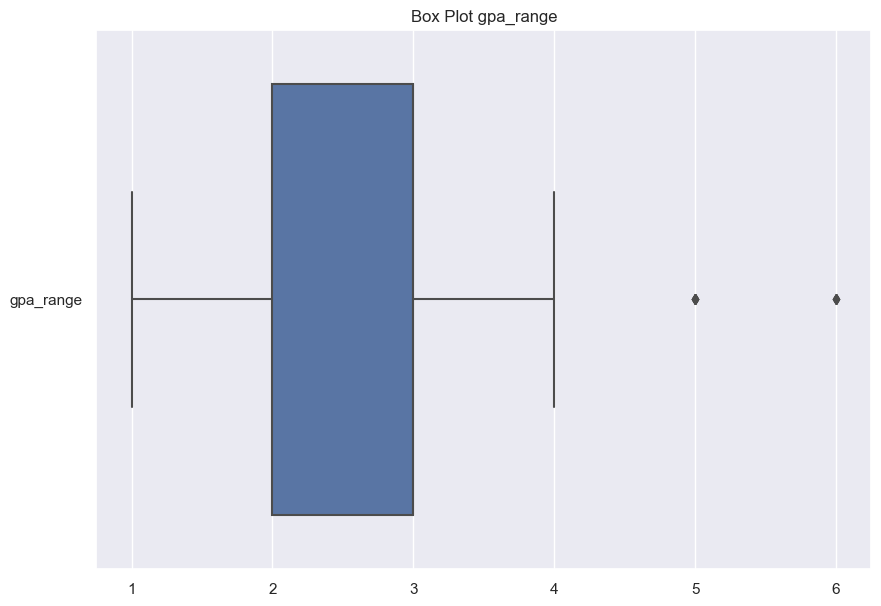

In [55]:
# fig, ax = plt.subplots(figsize=(12,4))
# ax = sns.countplot(newDF["gpa_range"])

sns.boxplot(data=Select_gpa_DF, orient = "h").set(title="Box Plot gpa_range")
print("value counts for gpa_range : ", Select_gpa_DF.value_counts())

[1 = 'Excellent'], 
[2 = 'Superior'], 
[3 = 'Very-Satisfactory'], 
[4 = 'Satisfactory'], 
[5 = 'Fairly-Satisfactory'], 
[6 = 'Barely-Satisfactory'],

gpa_range columns has an outliers these are the 5 and 6, the researhers decided to remain these ff. outliers in order to have a representation for people who belong witht these type of gpa range. 

----

# TRAIN AND SPLITS 49 FEATURES

In [56]:
df_train = newDF[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'gpa_range']]

In [57]:
df_train.shape

(327, 49)

In [58]:
features=df_train.columns[0:-1].values
print('Features : \n', features)

Features : 
 ['age' 'sex' 'course' 'yr_level' 'socioeconomic_stat' 'personality_type'
 'fam_support' 'working_stud' 'scholar' 'TM1' 'TM2' 'TM3' 'TM4' 'TM5'
 'TM6' 'TM7' 'CAP1' 'CAP2' 'CAP3' 'CAP4' 'GSS1' 'GSS2' 'GSS3' 'GSS4'
 'GSS5' 'GSS6' 'GSS7' 'EP1' 'EP2' 'EP3' 'EP4' 'EP5' 'EP6' 'NT1' 'NT2'
 'NT3' 'desktop' 'laptop' 'mobile_phone' 'tablet' 'wifi' 'prepaid-wifi'
 'cellular_data' 'hotspot' 'vhigh_speed' 'high_speed' 'moderate_speed'
 'light_speed']


In [59]:
target=df_train.columns[-1:].values
print('Features : \n', target)

Features : 
 ['gpa_range']


In [60]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train, test_size=0.2, random_state=3, stratify=newDF["gpa_range"])

In [61]:
train.shape

(261, 49)

In [62]:
test.shape

(66, 49)

#### load the data in the variables 

In [63]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

---

-----

# Dataframe Correlation Analysis

the researcher shows the strong relation between features with no duplicated pairs 

course        sex                  -0.379357
tablet        mobile_phone         -0.340468
working_stud  fam_support          -0.325429
GPA           course               -0.277610
wifi          socioeconomic_stat   -0.241857
dtype: float64
NT2       NT1    0.436660
yr_level  age    0.470520
TM5       TM4    0.478908
EP2       EP1    0.487032
EP5       EP4    0.491682
dtype: float64


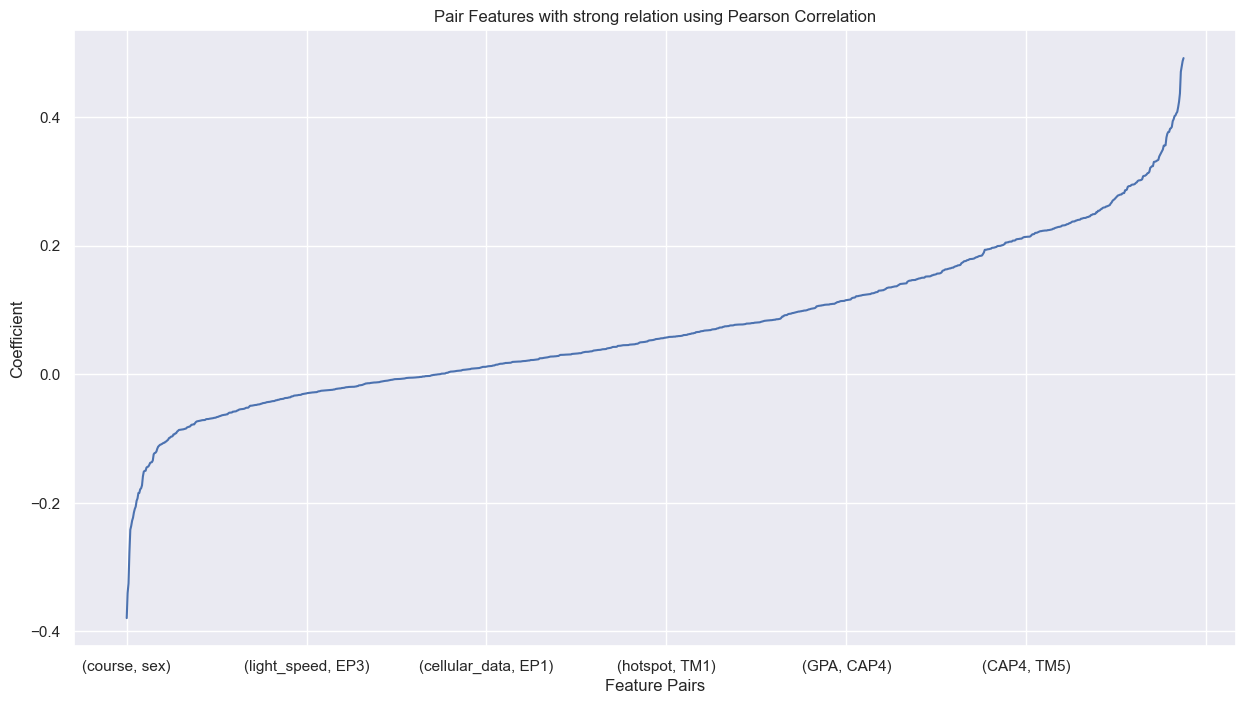

In [64]:
# Create correlation matrix
pearson_corr = newDF.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = pearson_corr.where(
    np.triu(np.ones(pearson_corr.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
sorted_mat.plot(figsize=(15,8), color="b")
plt.title("Pair Features with strong relation using Pearson Correlation")
plt.ylabel("Coefficient")
plt.xlabel("Feature Pairs")
print(sorted_mat.head(5))
print(sorted_mat.tail(5))

course        sex                  -0.372164
GPA           course               -0.331112
working_stud  fam_support          -0.325429
tablet        mobile_phone         -0.310165
wifi          socioeconomic_stat   -0.297289
dtype: float64
TM5       TM4         0.470390
EP2       EP1         0.480596
EP5       EP4         0.493554
GPA       yr_level    0.524801
yr_level  age         0.584288
dtype: float64


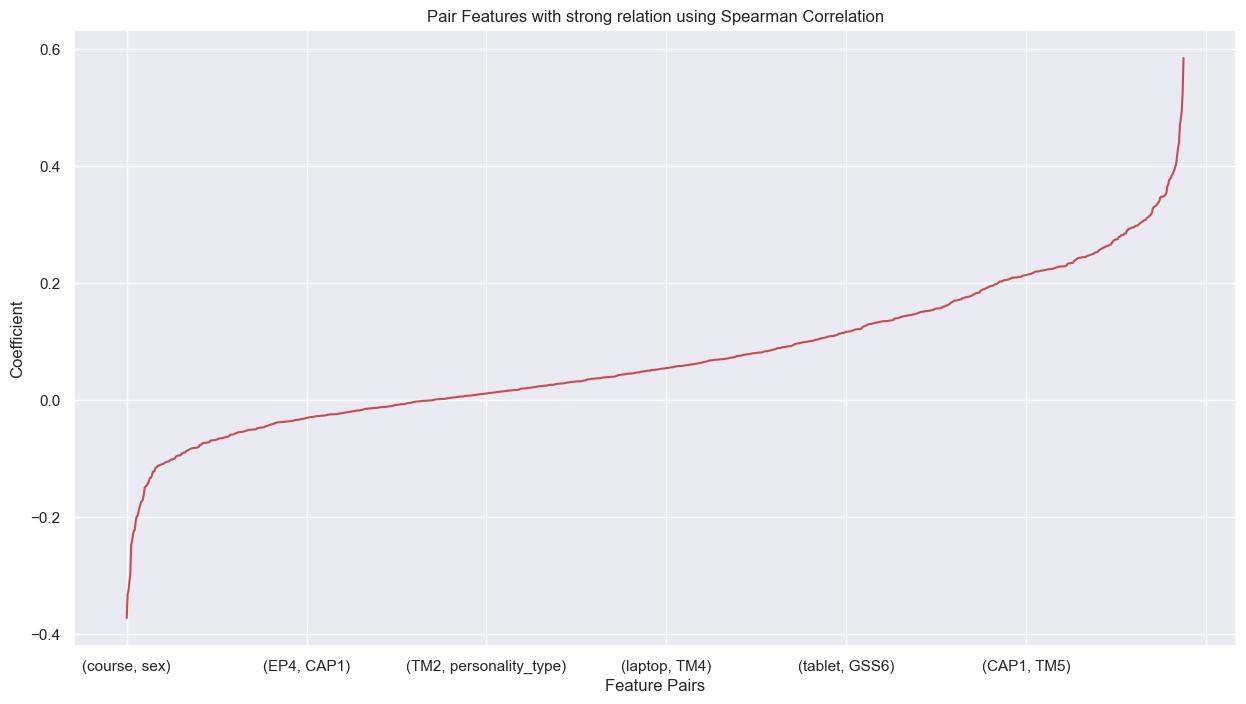

In [65]:
# Create correlation matrix
spearman_corr = newDF.corr(method='spearman')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = spearman_corr.where(
    np.triu(np.ones(spearman_corr.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
sorted_mat.plot(figsize=(15,8), color="r")
plt.title("Pair Features with strong relation using Spearman Correlation")
plt.ylabel("Coefficient")
plt.xlabel("Feature Pairs")
print(sorted_mat.head(5))
print(sorted_mat.tail(5))

course        sex                  -0.342216
working_stud  fam_support          -0.325429
tablet        mobile_phone         -0.295933
wifi          socioeconomic_stat   -0.272303
GPA           course               -0.260281
dtype: float64
GPA       yr_level    0.422602
TM5       TM4         0.446658
EP5       EP4         0.459440
EP2       EP1         0.468695
yr_level  age         0.528093
dtype: float64


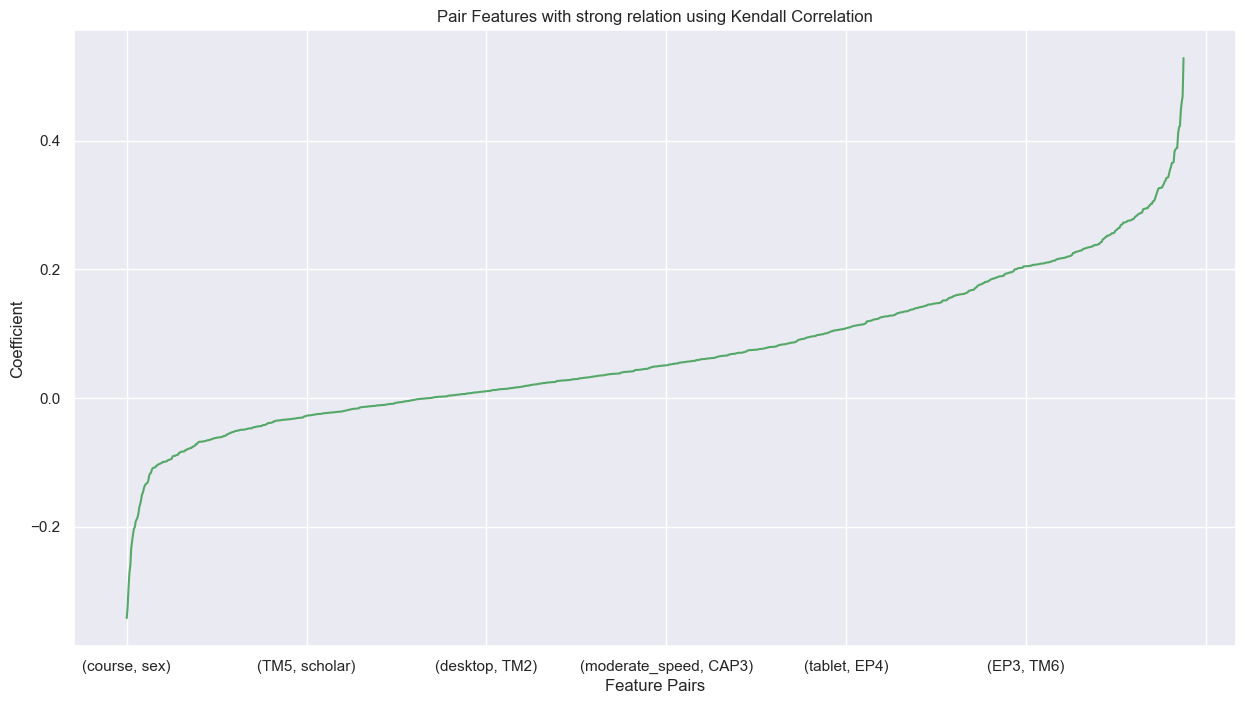

In [66]:
# Create correlation matrix
kendall_corr = newDF.corr(method='kendall')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = kendall_corr.where(
    np.triu(np.ones(kendall_corr.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
sorted_mat.plot(figsize=(15,8), color="g")
plt.title("Pair Features with strong relation using Kendall Correlation")
plt.ylabel("Coefficient")
plt.xlabel("Feature Pairs")
print(sorted_mat.head(5))
print(sorted_mat.tail(5))


## Correlational Analysis Personality Type vs gpa_range 

Text(0.5, 1.0, 'kendall')

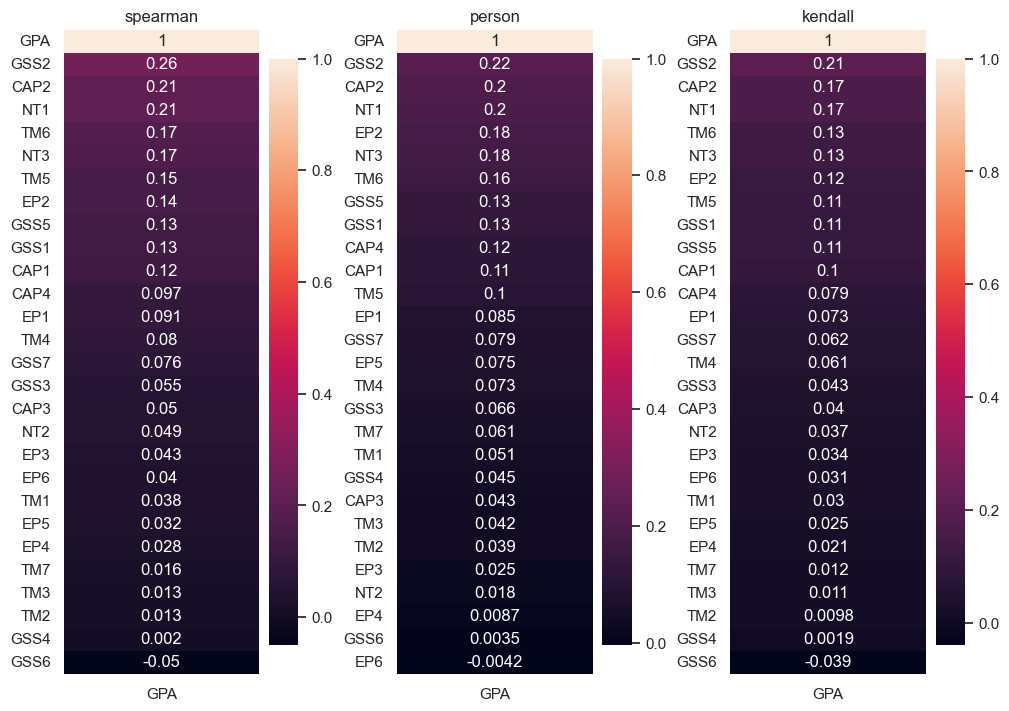

In [67]:
#gpa_range vs personality_type
study_habits = newDF.iloc[:, 10 :37]
gpa_range_PerType = pd.concat([study_habits,  newDF["GPA"]], axis=1)
_study_habitsSpearmanCorr_ = gpa_range_PerType.corr(method="spearman")[['GPA']].sort_values(by='GPA',
                                                                                            ascending=False)
_study_habitsPearsonCorr_ = gpa_range_PerType.corr(method="pearson")[['GPA']].sort_values(by='GPA',
                                                                                            ascending=False)
_study_habitsKendallCorr_ = gpa_range_PerType.corr(method="kendall")[['GPA']].sort_values(by='GPA',
                                                                                            ascending=False)
fig, axes = plt.subplots(1, 3, constrained_layout=True)
sns.heatmap(_study_habitsSpearmanCorr_, annot=True, ax=axes[0]).set_title("spearman")
sns.heatmap(_study_habitsPearsonCorr_, annot=True, ax=axes[1]).set_title("person")
sns.heatmap(_study_habitsKendallCorr_, annot=True, ax=axes[2]).set_title("kendall")

Some of the features interpret by the spearman method are closer to >= 0.1 and <= 1. it appears that the spearman way is reliable for an ordinal variable. That is why we presume that the spearman shows features with a 0.1 value.

### persStudy Habits vs gpa_range

<AxesSubplot:>

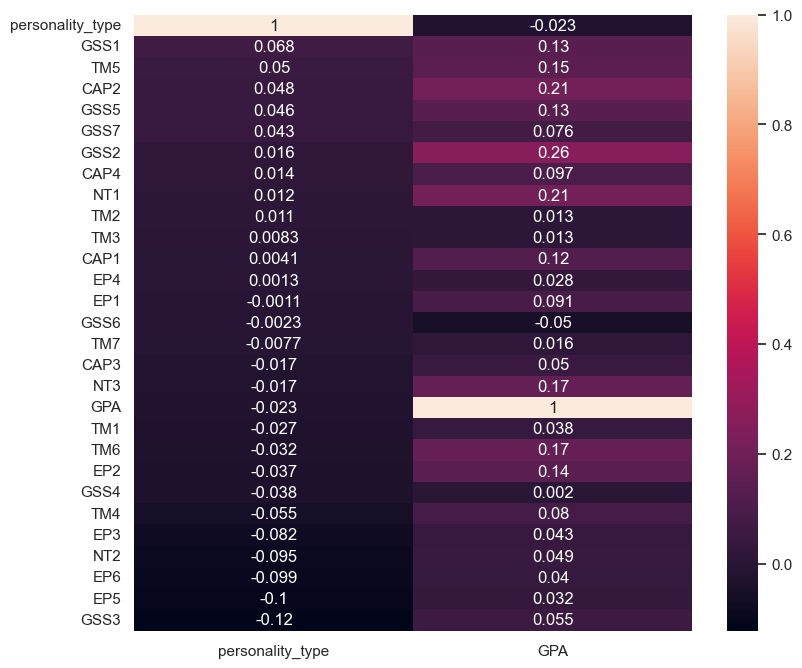

In [68]:
studyHabits_gpa = newDF[['TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
     'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'personality_type', 'GPA']]

gpa_PerType_corr_SP= studyHabits_gpa.corr(method="spearman")[['personality_type', 'GPA']].sort_values(by='personality_type', ascending=False)

fig, axes = plt.subplots(figsize=(9, 8))
sns.heatmap(gpa_PerType_corr_SP, annot=True)



There is no evidence of a high positive association when using all correlation techniques (GPA range & GPA & study habits) VS personality. Even if there is a significant negative correlation, it demonstrates that characteristics have just a few relevant correlations.

----

# Split data to train and test dataset

In [69]:
df_train = newDF[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'gpa_range']]

print("\n dataframe shape: ",df_train.shape)

features=df_train.columns[0:-1].values
print('\nFeatures : \n', features,"\n")

target=df_train.columns[-1:].values
print('\nFeatures : \n', target, "\n")

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train, test_size=0.2, random_state=82, stratify=newDF["gpa_range"])

print("\nTrain shape: ",train.shape)

print("\nTest shape: ", test.shape)

#### load the data in the variables 

#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]


 dataframe shape:  (327, 49)

Features : 
 ['age' 'sex' 'course' 'yr_level' 'socioeconomic_stat' 'personality_type'
 'fam_support' 'working_stud' 'scholar' 'TM1' 'TM2' 'TM3' 'TM4' 'TM5'
 'TM6' 'TM7' 'CAP1' 'CAP2' 'CAP3' 'CAP4' 'GSS1' 'GSS2' 'GSS3' 'GSS4'
 'GSS5' 'GSS6' 'GSS7' 'EP1' 'EP2' 'EP3' 'EP4' 'EP5' 'EP6' 'NT1' 'NT2'
 'NT3' 'desktop' 'laptop' 'mobile_phone' 'tablet' 'wifi' 'prepaid-wifi'
 'cellular_data' 'hotspot' 'vhigh_speed' 'high_speed' 'moderate_speed'
 'light_speed'] 


Features : 
 ['gpa_range'] 


Train shape:  (261, 49)

Test shape:  (66, 49)


----

# FEATURE SELECTION

### Apply mutual_info_classif for features selection

In [70]:
from sklearn.feature_selection import mutual_info_classif

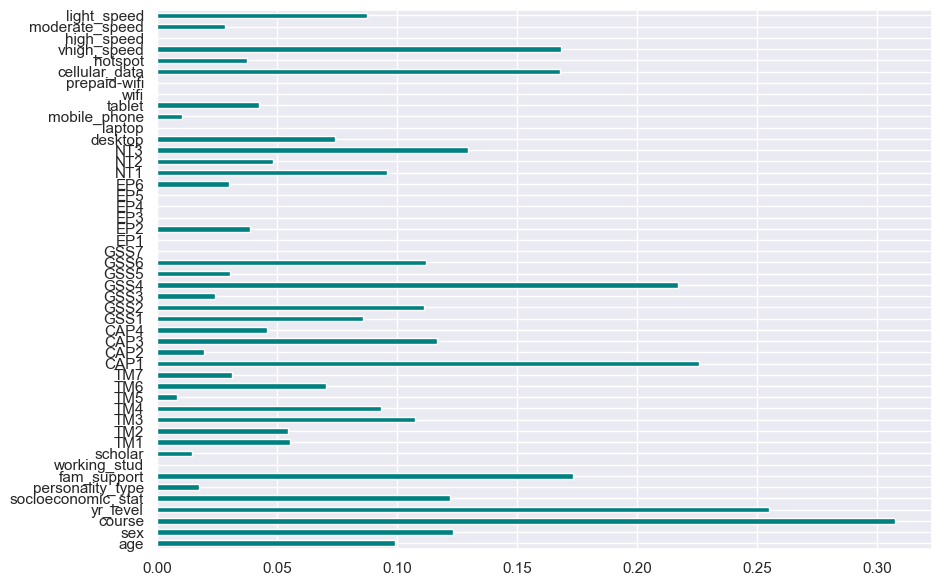

In [71]:
newX_select_mic = mutual_info_classif(X_train, Y_train)
feature_impor_mic = pd.Series(newX_select_mic, df_train.columns[0:len(df_train.columns)-1])
feature_impor_mic.plot(kind="barh", color= 'teal')
plt.show()

The mutual class info shows only seven features that exceed the 0.1 value, and these are vhigh_speed, NT1, CAP4, TM2, fam_support, and yr_level. Features fam_support and  yr_level got 0.2 deal. However, more than the following determinants is needed to indicate reliable mutual information.

-----

### APPLY SPEARMAN CORRELATION

In [72]:
# Select_gpa_DF
temp_df = newDF[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed']]

com_df = pd.concat([temp_df, Select_gpa_DF], axis=1)

cor = com_df.corr(method = "spearman")
cor_target = abs(cor["gpa_range"])
relevant_features = cor_target[cor_target > 0.2]
cor_feat = relevant_features.index.tolist()

In [73]:
cor

age       sex    course  yr_level  \
age                 1.000000  0.004422  0.016873  0.584288   
sex                 0.004422  1.000000 -0.372164 -0.051953   
course              0.016873 -0.372164  1.000000 -0.053907   
yr_level            0.584288 -0.051953 -0.053907  1.000000   
socioeconomic_stat  0.037457  0.160014 -0.071765  0.061174   
personality_type   -0.016625  0.002584  0.099303 -0.016777   
fam_support        -0.076021 -0.003026 -0.067866  0.168764   
working_stud        0.049980 -0.023790  0.174086 -0.026264   
scholar             0.046061 -0.071773  0.090593 -0.001884   
TM1                 0.036931  0.124660 -0.065553  0.031390   
TM2                -0.064095  0.045221 -0.072922 -0.027168   
TM3                -0.037866  0.007195 -0.083756 -0.076551   
TM4                -0.036223  0.219783 -0.109870 -0.000376   
TM5                 0.032497  0.067871 -0.041938  0.052459   
TM6                 0.051510  0.180355 -0.169446  0.058733   
TM7                -0.040881  0.028146 -0.099838 -0.065602   
CAP1                0.026493  0.041379 -0.105005  0.031160   
CAP2                0.069719  0.077029 -0.073706  0.082612   
CAP3                0.109721  0.012437 -0.062564  0.040050   
CAP4                0.052865  0.030960 -0.021651  0.046336   
GSS1                0.067206  0.012463 -0.020156  0.010359   
GSS2                0.135295  0.097246 -0.132577  0.109721   
GSS3                0.021349  0.128353 -0.108545 -0.037072   
GSS4               -0.014139 -0.038704  0.152051 -0.014189   
GSS5                0.044004  0.045883 -0.083042  0.022169   
GSS6               -0.000288  0.071122 -0.002655 -0.052682   
GSS7                0.003356  0.107340 -0.147152 -0.052738   
EP1                -0.025985  0.073365 -0.050081  0.088716   
EP2                 0.017380  0.032232 -0.026425  0.050348   
EP3                 0.007140 -0.020063  0.026824  0.049316   
EP4                 0.035843  0.001865 -0.007540  0.039521   
EP5                 0.091494  0.008994 -0.006474  0.037484   
EP6                 0.048810 -0.008318 -0.011697  0.006608   
NT1                 0.176004  0.105334 -0.198632  0.134893   
NT2                 0.058449  0.077575 -0.108950  0.038856   
NT3                 0.095953  0.156090 -0.091617  0.088584   
desktop             0.010377 -0.246562  0.214463 -0.057456   
laptop             -0.120713 -0.109375  0.143862 -0.146316   
mobile_phone        0.020068  0.096996 -0.142041  0.014357   
tablet              0.021659 -0.101195  0.031950 -0.028263   
wifi               -0.018733 -0.173778  0.079938 -0.094538   
prepaid-wifi        0.046303 -0.094146  0.057694 -0.010404   
cellular_data       0.020125  0.108685 -0.090641  0.101982   
hotspot             0.032701 -0.022059 -0.004255  0.044505   
vhigh_speed         0.071275 -0.050376  0.035561  0.078480   
high_speed          0.077887 -0.081230 -0.000730  0.016691   
moderate_speed      0.101391  0.071462  0.015348 -0.036985   
light_speed         0.016246  0.023243  0.070362 -0.100309   
gpa_range           0.337252  0.128897 -0.251297  0.504006   

                    socioeconomic_stat  personality_type  fam_support  \
age                           0.037457         -0.016625    -0.076021   
sex                           0.160014          0.002584    -0.003026   
course                       -0.071765          0.099303    -0.067866   
yr_level                      0.061174         -0.016777     0.168764   
socioeconomic_stat            1.000000          0.072602     0.005084   
personality_type              0.072602          1.000000    -0.058349   
fam_support                   0.005084         -0.058349     1.000000   
working_stud                  0.021915         -0.047731    -0.325429   
scholar                      -0.014846          0.043726    -0.032710   
TM1                           0.100934         -0.026785     0.024720   
TM2                           0.008864          0.011408     0.098066   
TM3                          -0.046963          

###### print("spaerman features (0.2 value) :", cor_feat)
print("spearman correlation dimension :", relevant_features.shape)

Spearman correlation with 0.2 positive coefficient value, this method resulted from 6 features specifically; 'age,' 'course,' 'yr_level,' 'CAP2', and 'GSS2' in respect to the particular column the 'gpa_range.' 

------

### APPLY SelectKBest 

In [74]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
newX_select = SelectKBest(score_func=chi2, k=37).fit(X_train, Y_train)
f = newX_select.get_support(1)
X_new = X_train[X_train.columns[f]] # final features`

# Kbest_features= pd.concat([X_new,df["gpa_range"]],axis=1)
# Kbest_features = Kbest_features.dropna(axis=0, inplace=False)

print("Num Features before:", df.shape[1])
print("Num Features after:", X_new.shape[1])

Num Features before: 53
Num Features after: 37


In [75]:
X_new.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed'],
      dtype='object')

JUSTIFICATION:
   The researchers implemented three features selection, the mutual_info_classif, spearman correlation, and selectKBest.
   
   Since most of the interaction of each feature needs to show a substantial value, according to the spearman correlation interpreted feature of gpa_range and yr_level with 0.4 stands as the highest garnered value for all indicators. However, the researchers cannot justify other factors by accepting this result. 
   
   The researchers decide to redeem the majority of the features. To have a representation for each factor. And only feature selection that satisfies the condition is the selecKBest with score_func of chi2, resulting in 37 features.

---

----

# TRAIN AND SPLITS 37 FEATURES

In [76]:
SelectKBest_features = newDF[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
                              'personality_type', 'working_stud', 'scholar', 
                              'TM3', 'TM4', 'TM5','TM6', 'TM7', 
                              'CAP2', 'CAP3', 'CAP4', 
                              'GSS1', 'GSS2', 'GSS3', 'GSS4','GSS5', 'GSS6', 'GSS7', 
                              'EP1', 'EP2', 'EP3', 'EP5', 
                              'NT1', 'NT2', 'NT3',
                              'desktop', 'laptop', 'mobile_phone', 
                              'wifi', 'cellular_data',
                              'high_speed', 'light_speed',
                              'gpa_range'
                             ]]

In [77]:
SelectKBest_features.shape

(327, 38)

In [78]:
SelectKBest_features

age  sex  course  yr_level  socioeconomic_stat  personality_type  \
0    19.0    0       3         2                   1                 1   
1    19.0    0       3         2                   2                 2   
2    19.0    0       3         2                   1                15   
3    19.0    0       3         2                   2                 2   
4    20.0    0       3         2                   1                 4   
..    ...  ...     ...       ...                 ...               ...   
322  19.0    0       4         2                   1                 3   
323  21.0    0       4         2                   2                 3   
324  19.0    0       4         2                   1                 5   
325  19.0    0       4         2                   1                 3   
326  21.0    1       4         2                   1                 9   

     working_stud  scholar  TM3  TM4  ...  NT2  NT3  desktop  laptop  \
0               0        1    2    1  ...    1    1        2       1   
1               0        0    2    2  ...    2    1        2       2   
2               0        0    1    3  ...    2    3        1       3   
3               1        0    2    2  ...    2    1        2       3   
4               0        0    2    2  ...    1    2        3       2   
..            ...      ...  ...  ...  ...  ...  ...      ...     ...   
322             0        0    1    3  ...    2    1        3       1   
323             0        0    1    2  ...    2    2        3       1   
324             0        0    1    2  ...    2    2        2       2   
325             0        0    1    2  ...    3    3        1       3   
326             0        0    2    1  ...    3    2        3       1   

     mobile_phone  wifi  cellular_data  high_speed  light_speed  \
0               1     3              1           1            2   
1               2     2              2           2            2   
2               2     1              1           1            2   
3               1     1              3           2            2   
4               1     2              2           2            1   
..            ...   ...            ...         ...          ...   
322             1     3              1           2            3   
323             2     1              3           2            3   
324             1     1              1           2            2   
325             1     1              2           1            3   
326             1     3              1           2            2   

             gpa_range  
0             Superior  
1             Superior  
2             Superior  
3             Superior  
4             Superior  
..                 ...  
322           Superior  
323  Very-Satisfactory  
324  Very-Satisfactory  
325           Superior  
326           Superior  

[327 rows x 38 columns]

In [79]:
features2 = SelectKBest_features.columns[0:-1].values
features2

array(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3',
       'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1',
       'NT2', 'NT3', 'desktop', 'laptop', 'mobile_phone', 'wifi',
       'cellular_data', 'high_speed', 'light_speed'], dtype=object)

In [80]:
target2= SelectKBest_features.columns[-1:].values
target2

array(['gpa_range'], dtype=object)

In [81]:
# train_test_split for new features 
train2, test2 =train_test_split(SelectKBest_features, test_size=0.2, random_state=42,  
                                stratify = SelectKBest_features["gpa_range"])

In [82]:
# Kbest_features load the data in the variables 
X2_train = train2[features2]
Y2_train = train2[target2]
X2_test = test2[features2]
Y2_test = test2[target2]

### Check Target Distribution

Class=4, n=128 (39.144%)
Class=3, n=45 (13.761%)
Class=5, n=142 (43.425%)
Class=0, n=4 (1.223%)
Class=2, n=6 (1.835%)
Class=1, n=2 (0.612%)


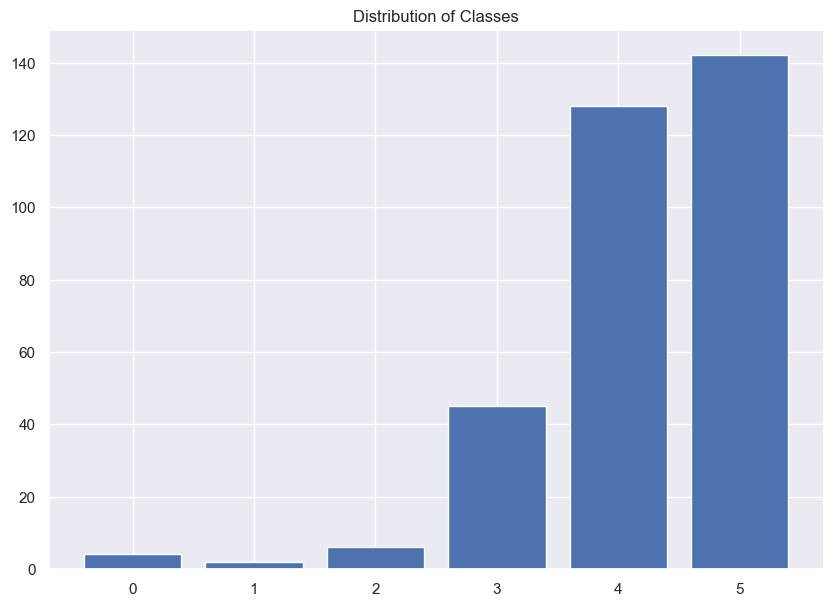

Very-Satisfactory      142
Superior               128
Satisfactory            45
Fairly-Satisfactory      6
Barely-Satisfactory      4
Excellent                2
Name: gpa_range, dtype: int64

In [83]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# Apply SMOTE Technique

data = SelectKBest_features.values

X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
         per = v / len(y) * 100
         print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
            
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
plt.title("Distribution of Classes")
pyplot.show()
newDF["gpa_range"].value_counts()

the target distribution appears to be imbalance, the researchers will use SMOTE technique to treat this imbalance classification

Class=4, n=128 (39.144%)
Class=3, n=45 (13.761%)
Class=5, n=142 (43.425%)
Class=0, n=4 (1.223%)
Class=2, n=6 (1.835%)
Class=1, n=2 (0.612%)

In [84]:
SelectKBest_features.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed', 'gpa_range'],
      dtype='object')

# SMOTE Technique 

Class=4, n=128 (39.144%)
Class=3, n=100 (30.581%)
Class=5, n=142 (43.425%)
Class=0, n=100 (30.581%)
Class=2, n=100 (30.581%)
Class=1, n=100 (30.581%)


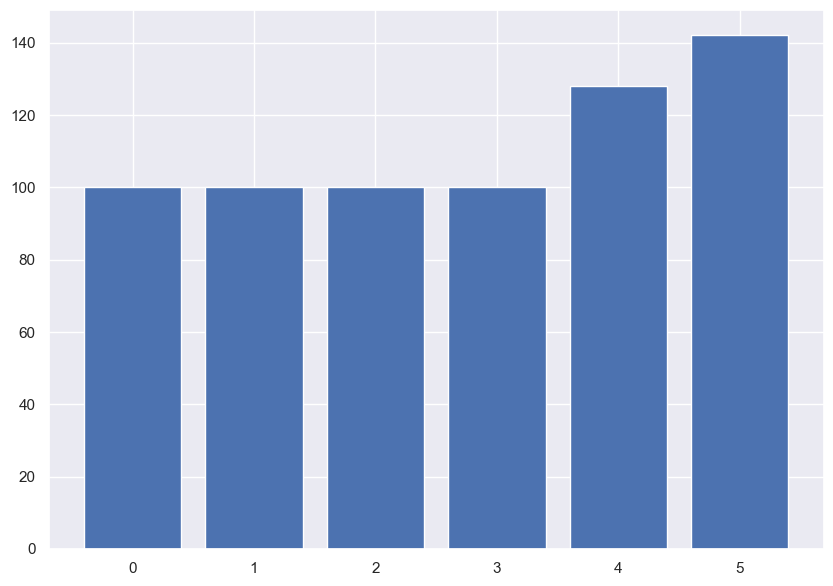

In [85]:
data = SelectKBest_features.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# transform the dataset
strategy = {0:100, 1:100, 2:100, 3:100, 4:128, 5:142}
xSmote, ySmote = SMOTE(k_neighbors=1, sampling_strategy=strategy).fit_resample(X, y)

#summarize distribution
counter = Counter(ySmote)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [86]:
#train_test_split using SMOTE
XS_train, XS_test, yS_train, yS_test = train_test_split(xSmote, 
                                                        ySmote, 
                                                        test_size=0.3, 
                                                        random_state=42,
                                                       )


In [87]:
XS_train =  pd.DataFrame(XS_train, columns = ['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed'])

yS_train = pd.DataFrame(yS_train, columns = ['gpa_range'])


XS_test =  pd.DataFrame(XS_test, columns = ['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4',
       'GSS5', 'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'wifi', 'cellular_data',
       'high_speed', 'light_speed'])

# yS_test = pd.DataFrame(yS_test, columns = ['gpa_range'])

In [88]:
#convert dataframe value float to int

XS_train = XS_train.iloc[:, :].astype('int')
XS_test  = XS_test.iloc[:, :].astype('int')
yS_train = yS_train.iloc[:, :].astype('int')
# yS_test  = yS_test.iloc[:, :].astype('int')

In [89]:
XS_test

age  sex  course  yr_level  socioeconomic_stat  personality_type  \
0     21    0       2         2                   1                 8   
1     21    0       2         4                   1                 8   
2     19    0       1         2                   2                 1   
3     20    0       2         3                   1                 6   
4     21    0       1         4                   1                 1   
..   ...  ...     ...       ...                 ...               ...   
196   19    1       2         2                   1                 0   
197   19    1       2         2                   1                 0   
198   22    0       2         2                   1                 8   
199   21    0       2         4                   2                 7   
200   19    0       2         2                   1                 8   

     working_stud  scholar  TM3  TM4  ...  NT1  NT2  NT3  desktop  laptop  \
0               1        0    2    2  ...    1    1    2        2       2   
1               0        0    2    1  ...    2    2    2        3       1   
2               0        0    2    1  ...    1    1    1        1       2   
3               0        0    2    2  ...    2    1    2        1       2   
4               0        0    2    3  ...    3    2    2        3       2   
..            ...      ...  ...  ...  ...  ...  ...  ...      ...     ...   
196             0        0    1    2  ...    2    2    2        3       2   
197             0        0    2    2  ...    2    2    2        1       2   
198             1        0    2    2  ...    1    1    2        2       2   
199             0        0    1    2  ...    2    1    1        1       2   
200             0        0    1    1  ...    1    2    1        1       3   

     mobile_phone  wifi  cellular_data  high_speed  light_speed  
0               1     2              2           1            1  
1               1     3              1           2            2  
2               1     1              2           2            2  
3               2     1              1           2            2  
4               1     3              1           3            2  
..            ...   ...            ...         ...          ...  
196             1     3              1           2            1  
197             1     1              2           1            2  
198             1     2              2           1            1  
199             1     1              2           2            2  
200             1     1              1           2            1  

[201 rows x 37 columns]

In [90]:
yS_train

gpa_range
0            4
1            5
2            0
3            3
4            3
..         ...
464          5
465          4
466          5
467          1
468          5

[469 rows x 1 columns]

--------

### 37 Features arranged in value scores.

[ 2.11  4.76 13.43 14.23  1.91  9.98 11.82  6.74  0.53  2.11  0.97  2.83
  1.5   2.59  1.03  2.17  0.68  3.03  0.91  1.18  1.8   0.92  2.02  2.23
  2.92  0.39  1.01  1.69  1.13  0.82  2.55  1.2   3.87  0.35  1.94  1.15
  1.32]


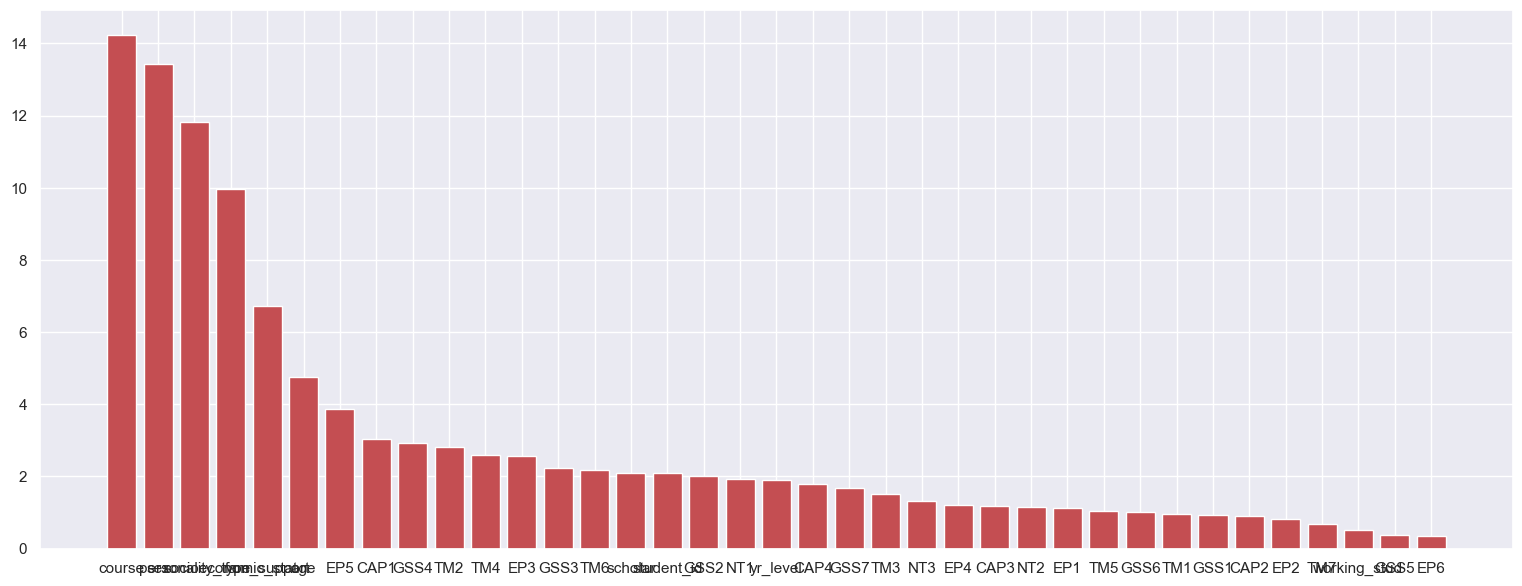

In [91]:
# feature extraction
test = SelectKBest(score_func=chi2, k=37)
fit = test.fit(X2_train, Y2_train)
score = []

# summarize scores
np.set_printoptions(precision=2)

scores = score.append(fit.scores_)
print(fit.scores_)

indices = np.argsort(fit.scores_)[::-1]

# To get your top 10 feature names
features = []

for i in range(37):
    features.append(newDF.columns[indices[i]])
    
# Now plot
plt.figure(figsize=(19, 7))
plt.bar(features, fit.scores_[indices[range(37)]], color='r', align='center')
plt.show()

----

### Principal component analysis (PCA).

Text(0, 0.5, 'explained_variance_ratio_')

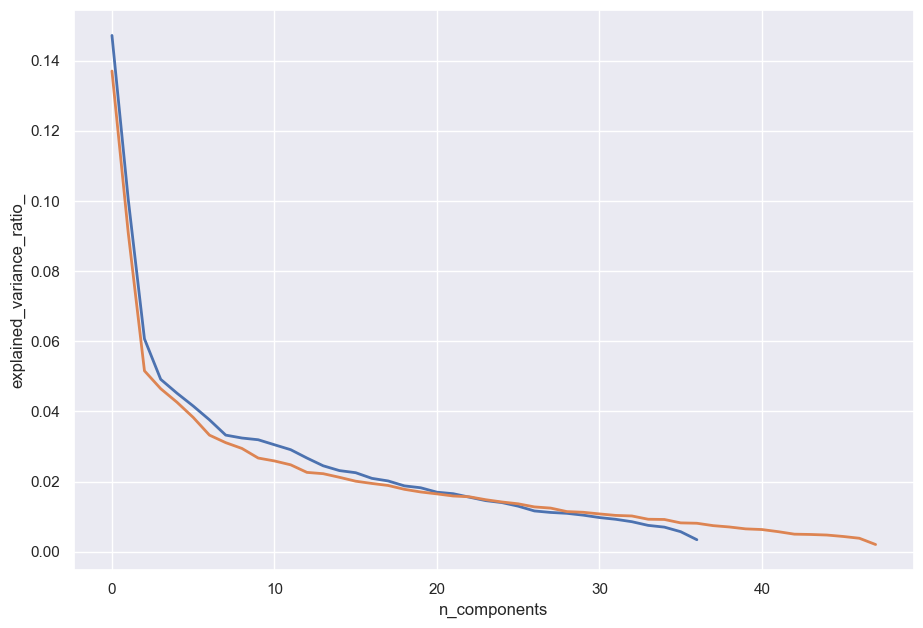

In [92]:
from sklearn.decomposition import PCA

x_train_kb = (X2_train-X2_train.mean())/(X2_train.max()-X2_train.min())

x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())

pca_trainkb = PCA()
pca_trainACTUAL = PCA()

pca_trainkb.fit(x_train_kb)
pca_trainACTUAL.fit(x_train_N)

plt.figure(1, figsize=(12, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca_trainkb.explained_variance_ratio_, linewidth=2)
plt.plot(pca_trainACTUAL.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Amount of variance that each of the chosen components explains, in percentage terms.

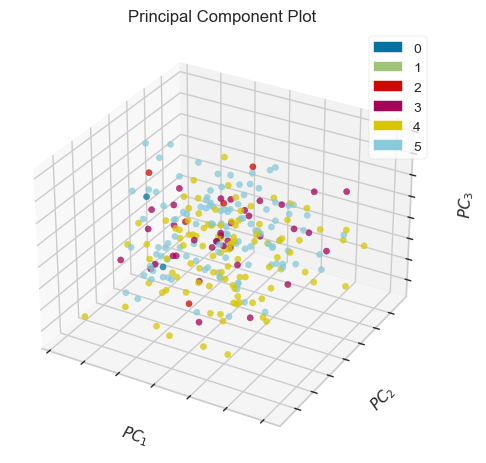


    Class=4, n=134 (39.181%)

    Class=3, n=48 (14.035%)

    Class=5, n=148 (43.275%)

    Class=0, n=4 (1.170%)

    Class=2, n=6 (1.754%)

    Class=1, n=2 (0.585%)



In [93]:
from yellowbrick.features import PCA
label_encoder = LabelEncoder()

encode_y = label_encoder.fit_transform(Y2_train)

# classes = ['Superior', 'Satisfactory', 'Very-Satisfactory',
#        'Barely-Satisfactory', 'Fairly-Satisfactory', 'Excellent']

visualizer = PCA( projection=3, scale=True, 
)


visualizer.fit_transform(X2_train, encode_y)
visualizer.show()

print("""
    Class=4, n=134 (39.181%)

    Class=3, n=48 (14.035%)

    Class=5, n=148 (43.275%)

    Class=0, n=4 (1.170%)

    Class=2, n=6 (1.754%)

    Class=1, n=2 (0.585%)
""")

If spherical distance metrics can be applied, the projected dataset can be evaluated along axes of main variation and interpreted.

---

# Feature-Target Relationship

In [94]:
SelectKBest_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 327 non-null    float64
 1   sex                 327 non-null    int32  
 2   course              327 non-null    int32  
 3   yr_level            327 non-null    int64  
 4   socioeconomic_stat  327 non-null    int32  
 5   personality_type    327 non-null    int32  
 6   working_stud        327 non-null    int32  
 7   scholar             327 non-null    int32  
 8   TM3                 327 non-null    int32  
 9   TM4                 327 non-null    int32  
 10  TM5                 327 non-null    int32  
 11  TM6                 327 non-null    int32  
 12  TM7                 327 non-null    int32  
 13  CAP2                327 non-null    int32  
 14  CAP3                327 non-null    int32  
 15  CAP4                327 non-null    int32  
 16  GSS1    

<AxesSubplot:>

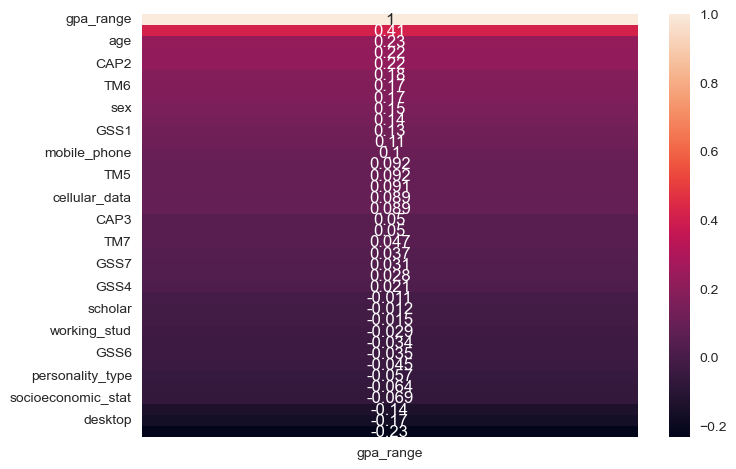

In [95]:
#locate gpa_range inside select kbest features
label_encode_gpa = SelectKBest_features.iloc[:, 37]
maplist = [{'col' : 'gpa_range', 
                    'mapping' : {'Excellent' : 1, 
                                 'Superior' : 2, 
                                 'Very-Satisfactory' : 3, 
                                 'Satisfactory' : 4, 
                                 'Fairly-Satisfactory' : 5, 
                                 'Barely-Satisfactory' : 6,
                                }
           }]

oeDic = OrdinalEncoder(mapping=maplist)
_gpa_DF = oeDic.fit_transform(label_encode_gpa) #transform data


temp_Kbest_feature = SelectKBest_features #create a temporary dataframe
# tempDrop_Kbest_feature = temp_Kbest_feature.drop("gpa_range", axis=1, inplace=True)
Kbest_features = pd.concat([SelectKBest_features, _gpa_DF], axis=1) #combine SelectKBest features with encoded gpa_range

#visualize corralationship between feature and target
corr = Kbest_features.corr()[['gpa_range']].sort_values(by='gpa_range', ascending=False)
sns.heatmap(corr, annot=True)

----

----

# Single-Model Implementation  

### Train and test single model

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42) Accuracy Score:  84.07960199004975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      0.96      0.98        25
           2       1.00      0.97      0.98        30
           3       0.77      0.75      0.76        32
           4       0.75      0.80      0.78        41
           5       0.69      0.69      0.69        45

    accuracy                           0.84       201
   macro avg       0.87      0.86      0.86       201
weighted avg       0.84      0.84      0.84       201
 

DecisionTreeClassifier(random_state=42) Accuracy Score:  77.11442786069652
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.96      1.00      0.98        25
           2       0.94      0.97      0.95        30
           3       0.57      0.75      0.65        32

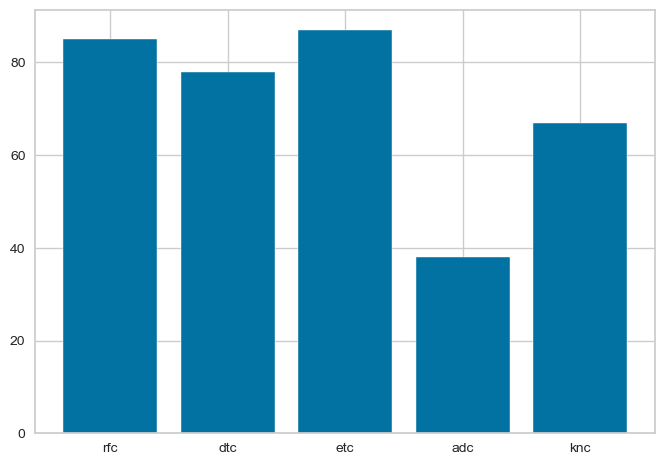

In [96]:
import math
from sklearn.model_selection import cross_val_score
results = []
names = {u"rfc": [], u"dtc": [], u"etc": [], u"adc":[], u"knc":[]}
est_single_model = [rfc, dtc, etc, adc, knc]

for single in est_single_model:
    ypred_single_clf = single.fit(XS_train, yS_train).predict(XS_test)
    accuracy = accuracy_score(yS_test, ypred_single_clf)*100
#     ypred_single_clf_OLD = single.fit(X_train,Y_train).predict(X_test)
#     accuracy_OLD = accuracy_score(Y_test, ypred_single_clf_OLD)*100
    int_acc = math.ceil(accuracy)
    
    #append accuracy inside the the dict
    if single == rfc:
        names["rfc"]=int_acc
    if single == dtc:
        names["dtc"]=int_acc
    if single == etc:
        names["etc"]=int_acc
    if single == knc:
        names["knc"]=int_acc
    if single == adc:
        names["adc"]=int_acc

    print("{} Accuracy Score: ".format(single), accuracy)
    print(classification_report(yS_test, ypred_single_clf, ), "\n")

algo = list(names.keys())
values = list(names.values())

plt.bar(algo, values)


print("\n")
print("cross validation with 20 splits")
est_list = [rfc, dtc, etc, adc, knc]
for estimator in est_list:
    cv = KFold(n_splits = 20,  shuffle= True, random_state=42)
    single_cv = cross_val_score(estimator, XS_train, yS_train, cv=cv)
    print("\n[{}] cross validation score :".format(estimator), single_cv.mean())

Its shows the all single model only got < 65 accuracy score. It is hypothesize that the model can be improve by combining each model that will result a better prediction. The researcher will going to prove that ensemble technique is effective lifting weak learners by using meta estimator in boosting specifically AdaBoostClassifier.

------

# Train and test Boosting model

In [97]:
#create list of classifiers [NEW]
estimatorsNEW = [("RandomForestClassifier", rfc), 
              ("DecisionTreeClassifier", dtc), 
              ("ExtraTreesClassifier", etc), 
              ("AdaBoostClassifier", adc),
              ("KNeighborsClassifier", knc)]

In [98]:
# Apply GradientBoostingClassifier 
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsRestClassifier

Clf_GradBoost_estNEW = GradientBoostingClassifier(
                                                    max_depth=10,
                                                    max_features='auto',
                                                    learning_rate= 0.01,
                                                    n_estimators=50,
                                                    min_samples_leaf= 1,
                                                    subsample= 0.7,
                                                    random_state= 1
                                                 )

# Clf_GradBoost_estNEW = GradientBoostingClassifier()

clf_boosting_ensembleNEW = StackingClassifier(estimators=estimatorsNEW, 
                                              final_estimator=Clf_GradBoost_estNEW, 
                                              n_jobs=-1)

In [99]:
clf_boosting_ensembleNEW

StackingClassifier(estimators=[('RandomForestClassifier',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       random_state=42)),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier(random_state=42)),
                               ('ExtraTreesClassifier',
                                ExtraTreesClassifier(random_state=42)),
                               ('AdaBoostClassifier',
                                AdaBoostClassifier(learning_rate=2.0,
                                                   random_state=42)),
                               ('KNeighborsClassifier',
                                KNeighborsClassifier(algorithm='brute',
                                                     leaf_size=50))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                              max_depth=10,
                                                              max_features='auto',
                                                              n_estimators=50,
                                                              random_state=1,
                                                              subsample=0.7),
                   n_jobs=-1)

In [100]:
OVR_BOOST_37 = OneVsRestClassifier(clf_boosting_ensembleNEW).fit(XS_train, yS_train)  #One-vs-the-rest (OvR) multiclass strategy.
OVR_BOOST_49 = OneVsRestClassifier(clf_boosting_ensembleNEW).fit(X_train, Y_train) 

ypred_clf_boosting_ensembleNEW_37 = OVR_BOOST_37.predict(XS_test)
ypred_clf_boosting_ensembleNEW_49 = OVR_BOOST_49.predict(X_test)

print("\nEnsemble Boosting Model Accuracy Score for 49 features : {:0%}".format(accuracy_score(Y_test, ypred_clf_boosting_ensembleNEW_49)))
print("\n",classification_report(Y_test, ypred_clf_boosting_ensembleNEW_49))
# print("\n\n===========================================================================")
print("\nEnsemble Boosting Model Accuracy Score for 37 Features: {:0%}".format(accuracy_score(yS_test, ypred_clf_boosting_ensembleNEW_37)))
print("\n",classification_report(yS_test, ypred_clf_boosting_ensembleNEW_37))


Ensemble Boosting Model Accuracy Score for 49 features : 63.636364%

                      precision    recall  f1-score   support

Barely-Satisfactory       0.00      0.00      0.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.00      0.00      0.00         9
           Superior       0.71      0.77      0.74        26
  Very-Satisfactory       0.59      0.76      0.67        29

           accuracy                           0.64        66
          macro avg       0.26      0.31      0.28        66
       weighted avg       0.54      0.64      0.58        66


Ensemble Boosting Model Accuracy Score for 37 Features: 85.074627%

               precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        30
           3       0.92      0.72      0.81        32
           4       0.70      0.68   

#### Confusion Matrix of the 2 set Feature

Text(0.5, 1.0, '49 Features')

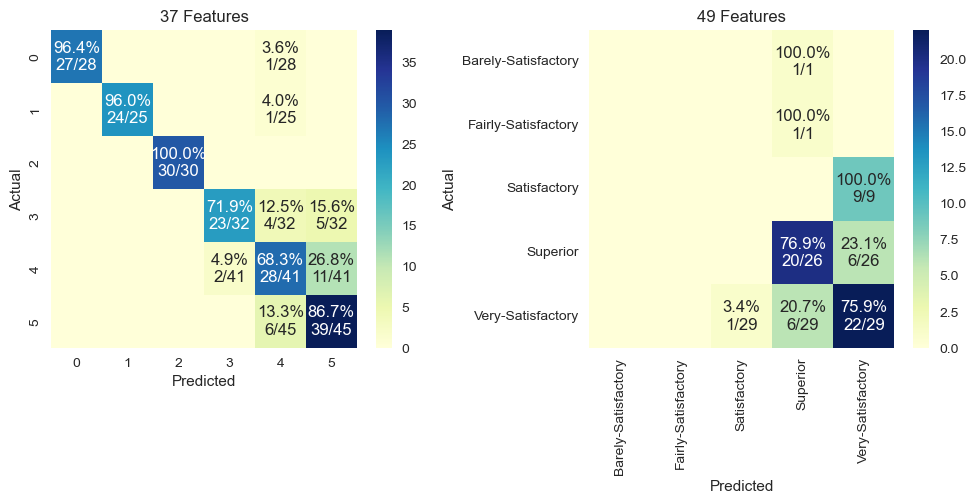

In [101]:
y1_true = yS_test
cm1 = confusion_matrix(yS_test, ypred_clf_boosting_ensembleNEW_37, labels=np.unique(y1_true))
y0_true = Y_test
cm2 = confusion_matrix(Y_test, ypred_clf_boosting_ensembleNEW_49, labels=np.unique(y0_true))

#BOOSTING WITH 25 FEATURES
cm_sum_1 = np.sum(cm1, axis=1, keepdims=True)
cm_perc_1= cm1 / cm_sum_1.astype(float) * 100
annot1 = np.empty_like(cm1).astype(str)
nrows, ncols = cm1.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm1[i, j]
        p = cm_perc_1[i, j]
        if c == 0:
            annot1[i, j] = ''
        else:
            s = cm_sum_1[i]
            annot1[i, j] = '%.1f%%\n%d/%d' % (p, c, s)

#BOOSTING WITH 49 FEATURES
cm_sum_2 = np.sum(cm2, axis=1, keepdims=True)
cm_perc_2= cm2 / cm_sum_2.astype(float) * 100
annot2 = np.empty_like(cm2).astype(str)
nrows, ncols = cm2.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm2[i, j]
        p = cm_perc_2[i, j]
        if c == 0:
            annot2[i, j] = ''
        else:
            s = cm_sum_2[i]
            annot2[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            
cm1 = pd.DataFrame(cm1, index=np.unique(y1_true), columns=np.unique(y1_true))
cm1.index.name = 'Actual'
cm1.columns.name = 'Predicted'
cm2 = pd.DataFrame(cm2, index=np.unique(y0_true), columns=np.unique(y0_true))
cm2.index.name = 'Actual'
cm2.columns.name = 'Predicted'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm1, cmap="YlGnBu", annot=annot1, fmt='', ax=ax[0])
sns.heatmap(cm2, cmap="YlGnBu", annot=annot2, fmt='', ax=ax[1])
plt.tight_layout()
ax[0].set_title("37 Features")
ax[1].set_title("49 Features")

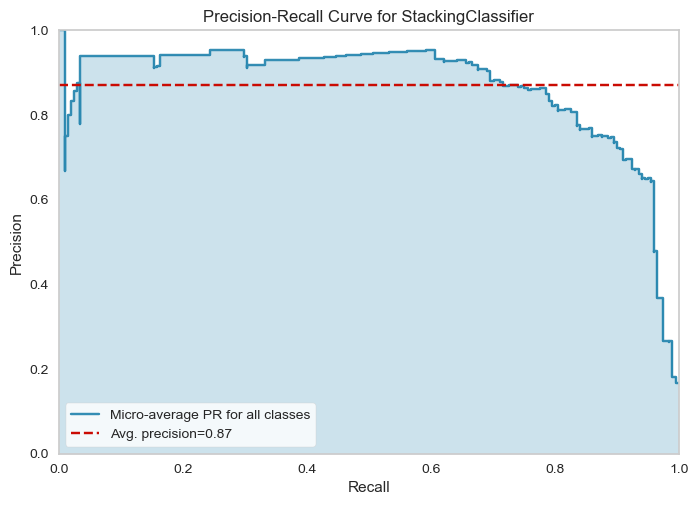

<AxesSubplot:title={'center':'Precision-Recall Curve for StackingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [102]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(clf_boosting_ensembleNEW)
viz.fit(XS_train, yS_train)
viz.score(XS_test, yS_test)
viz.show()

----

----

# Train and test Bagging model

In [103]:
#Use fit method for all algorithms to be store inside the list. 
rfc_fit = rfc.fit(XS_train, yS_train)
dtc_fit = dtc.fit(XS_train, yS_train)
etc_fit = etc.fit(XS_train, yS_train)
adc_fit = adc.fit(XS_train, yS_train)
knc_fit = knc.fit(XS_train, yS_train)


estimatorsNEW_fitted = [rfc_fit, dtc_fit, etc_fit, adc_fit, knc_fit] #create list for 'new' ensemble model

In [ ]:
clf_RandomForestClassifier = BaggingClassifier(rfc)
clf_DecisionTreeClassifier = BaggingClassifier(dtc)
clf_ExtraTreesClassifier = BaggingClassifier(etc)
clf_AdaBoostClassifier = BaggingClassifier(adc)
clf_KNeighborsClassifier = BaggingClassifier(knc)


clf_bagging_ensembleNEW = VotingClassifier(estimators = [('RandomForestClassifier', clf_RandomForestClassifier), 
                                           ('DecisionTreeClassifier', clf_DecisionTreeClassifier),
                                           ('ExtraTreesClassifier', clf_ExtraTreesClassifier),
                                           ('KNeighborsClassifier', clf_AdaBoostClassifier),
                                           ('AdaBoostClassifier', clf_KNeighborsClassifier),
                                       ], 
                                          voting = 'soft')

OVR_BAGG_37 = OneVsRestClassifier(clf_bagging_ensembleNEW).fit(XS_train, yS_train)
OVR_BAGG_49 = OneVsRestClassifier(clf_bagging_ensembleNEW).fit(X_train, Y_train)

predict_ = clf_bagging_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)

#model test prediction 
ypred_clf_bagging_ensembleNEW_37 = OVR_BAGG_37.predict(XS_test)
ypred_clf_bagging_ensembleNEW_49 = OVR_BAGG_49.predict(X_test)

print("\nEnsemble Bagging Model Accuracy Score for 49 features : {:0%}".format(accuracy_score(Y_test, ypred_clf_bagging_ensembleNEW_49)))
print("\n",classification_report(Y_test, ypred_clf_bagging_ensembleNEW_49))
print("\n\n===========================================================================")
print("\nEnsemble Bagging Model Accuracy Score for 37 Features: {:0%}".format(accuracy_score(yS_test, ypred_clf_bagging_ensembleNEW_37)))
print("\n",classification_report(yS_test, ypred_clf_bagging_ensembleNEW_37))

In [ ]:
y1_true = yS_test
cm1 = confusion_matrix(yS_test, ypred_clf_bagging_ensembleNEW_37, labels=np.unique(y1_true))
y0_true = Y_test
cm2 = confusion_matrix(Y_test, ypred_clf_bagging_ensembleNEW_49, labels=np.unique(y0_true))

#BOOSTING WITH 25 FEATURES
cm_sum_1 = np.sum(cm1, axis=1, keepdims=True)
cm_perc_1= cm1 / cm_sum_1.astype(float) * 100
annot1 = np.empty_like(cm1).astype(str)
nrows, ncols = cm1.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm1[i, j]
        p = cm_perc_1[i, j]
        if c == 0:
            annot1[i, j] = ''
        else:
            s = cm_sum_1[i]
            annot1[i, j] = '%.1f%%\n%d/%d' % (p, c, s)

#BOOSTING WITH 49 FEATURES
cm_sum_2 = np.sum(cm2, axis=1, keepdims=True)
cm_perc_2= cm2 / cm_sum_2.astype(float) * 100
annot2 = np.empty_like(cm2).astype(str)
nrows, ncols = cm2.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm2[i, j]
        p = cm_perc_2[i, j]
        if c == 0:
            annot2[i, j] = ''
        else:
            s = cm_sum_2[i]
            annot2[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            
cm1 = pd.DataFrame(cm1, index=np.unique(y1_true), columns=np.unique(y1_true))
cm1.index.name = 'Actual'
cm1.columns.name = 'Predicted'
cm2 = pd.DataFrame(cm2, index=np.unique(y0_true), columns=np.unique(y0_true))
cm2.index.name = 'Actual'
cm2.columns.name = 'Predicted'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm1, cmap="YlGnBu", annot=annot1, fmt='', ax=ax[0])
sns.heatmap(cm2, cmap="YlGnBu", annot=annot2, fmt='', ax=ax[1])
plt.tight_layout()
ax[0].set_title("37 Features")
ax[1].set_title("49 Features")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(clf_bagging_ensembleNEW)
viz.fit(XS_train, yS_train)
viz.score(XS_test, yS_test)
viz.show()

the precision recall curve shows the average precision of the bagging model is 77%, the micro average Adding up the total number of true positives, false negatives, and false positives. the grapgh the drop of its precision it reaches beyond 0.5 of its recall score the precision dramtically fall. 

----

------

# Cross Validation for each ensemble models

in this cross validation we'll gonna injecting the 37 adn 49 features for each model.

In [ ]:
cv1 = StratifiedKFold(n_splits = 5,  shuffle = True)
cv2 = StratifiedKFold(n_splits = 10,  shuffle = True)
cv3 = StratifiedKFold(n_splits = 15,  shuffle = True)
cv4 = StratifiedKFold(n_splits = 20,  shuffle = True)

In [ ]:
##### Cross Validation boosting
cv_37featureBoost_cv1 = cross_val_score(clf_boosting_ensembleNEW, XS_train, yS_train, cv=cv1, scoring="f1_weighted")
cv_37featureBoost_cv2 = cross_val_score(clf_boosting_ensembleNEW, XS_train, yS_train, cv=cv2, scoring="f1_weighted")
cv_37featureBoost_cv3 = cross_val_score(clf_boosting_ensembleNEW, XS_train, yS_train, cv=cv3, scoring="f1_weighted")
cv_37featureBoost_cv4 = cross_val_score(clf_boosting_ensembleNEW, XS_train, yS_train, cv=cv4, scoring="f1_weighted")

# cv_49featureBoost_cv1 = cross_val_score(clf_boosting_ensembleNEW, X_train, Y_train, cv=cv1, scoring="f1_weighted")
# cv_49featureBoost_cv2 = cross_val_score(clf_boosting_ensembleNEW, X_train, Y_train, cv=cv2, scoring="f1_weighted")
# cv_49featureBoost_cv3 = cross_val_score(clf_boosting_ensembleNEW, X_train, Y_train, cv=cv3, scoring="f1_weighted")
# cv_49featureBoost_cv4= cross_val_score(clf_boosting_ensembleNEW, X_train, Y_train, cv=cv4, scoring="f1_weighted")

print("37 FEATURES  [SelecKBEST]: ")
print("cv score  5 splits ", cv_37featureBoost_cv1.mean())
print("cv score 10 splits ", cv_37featureBoost_cv2.mean())
print("cv score 15 splits ", cv_37featureBoost_cv3.mean())
print("cv score 20 splits ", cv_37featureBoost_cv4.mean())

# print("\n\n")

# print("49 FEATURES : ")
# print("cv score  5 splits ", cv_49featureBoost_cv1.mean())
# print("cv score 10 splits ", cv_49featureBoost_cv2.mean())
# print("cv score 15 splits ", cv_49featureBoost_cv3.mean())
# print("cv score 20 splits ", cv_49featureBoost_cv4.mean())

In [ ]:
# Cross Validation bagging
cv_37featureBagging_cv1 = cross_val_score(clf_bagging_ensembleNEW, XS_train, yS_train, cv=cv1, scoring="f1_weighted")
cv_37featureBagging_cv2 = cross_val_score(clf_bagging_ensembleNEW, XS_train, yS_train, cv=cv2, scoring="f1_weighted")
cv_37featureBagging_cv3 = cross_val_score(clf_bagging_ensembleNEW, XS_train, yS_train, cv=cv3, scoring="f1_weighted")
cv_37featureBagging_cv4 = cross_val_score(clf_bagging_ensembleNEW, XS_train, yS_train, cv=cv4, scoring="f1_weighted")

# cv_49featureBagging_cv1 = cross_val_score(clf_bagging_ensembleNEW, X_train, Y_train, cv=cv1, scoring="f1_weighted")
# cv_49featureBagging_cv2 = cross_val_score(clf_bagging_ensembleNEW, X_train, Y_train, cv=cv2, scoring="f1_weighted")
# cv_49featureBagging_cv3 = cross_val_score(clf_bagging_ensembleNEW, X_train, Y_train, cv=cv3, scoring="f1_weighted")
# cv_49featureBagging_cv4= cross_val_score(clf_bagging_ensembleNEW, X_train, Y_train, cv=cv4, scoring="f1_weighted")


print("37 FEATURES [SelecKBEST]: ")
print("cv score  5 splits ", cv_37featureBagging_cv1.mean())
print("cv score 10 splits ", cv_37featureBagging_cv2.mean())
print("cv score 15 splits ", cv_37featureBagging_cv3.mean())
print("cv score 20 splits ", cv_37featureBagging_cv4.mean())

# print("\n\n")

# print("49 FEATURES : ")
# print("cv score  5 splits ", cv_49featureBagging_cv1.mean())
# print("cv score 10 splits ", cv_49featureBagging_cv2.mean())
# print("cv score 15 splits ", cv_49featureBagging_cv3.mean())
# print("cv score 20 splits ", cv_49featureBagging_cv4.mean())

With the use of features selection specifically SelectKBest and extracts 25 columns and chi-square test measures getting non-negative features. Furthermore, we perform cross validation with 10 folds default, comparing both models the 37 features performed better with high accuracy.

---

### Bias-variance decomposition

In [ ]:
# tempdf = newDF.drop(["gpa_range", "student_id"], axis=1) # drop the categorical gpa_range in the data frame


# tempdf1 = pd.concat([X_new, Select_gpa_DF], axis=1) # (285, 38) dimension
# tempdf2 = pd.concat([tempdf, Select_gpa_DF], axis=1) # (357, 50) dimension and attached the labelencoder gpa_range
 
# tempdf1 = tempdf1.dropna(axis=0, inplace=False)
# tempdf2 = tempdf2.dropna(axis=0, inplace=False)

# # #---------------------------#---------------------------#---------------------------#

# features3 =tempdf1.columns[0:-1].values
# target3 =tempdf1.columns[-1:].values # label encoded y target for select best features

# features4 =tempdf2.columns[0:-1].values
# target4 =tempdf2.columns[-1:].values # label encoded y target for OLD features

# # #---------------------------#---------------------------#---------------------------#

# #train_test_split for new features 
# entrain1, entest1 =train_test_split(tempdf1, test_size=0.2, random_state=42)
# entrain2, entest2 =train_test_split(tempdf2, test_size=0.2, random_state=42)

# # #---------------------------#---------------------------#---------------------------#

# # Kbest_features load the data in the variables with [encoded gpa_range]
# X3_train = entrain1[features3]
# Y3_train = entrain1[target3]
# X3_test = entest1[features3]
# Y3_test = entest1[target3]

# # Raw Features load the data in the variables with[encoded gpa_range]
# X4_train = entrain2[features4]
# Y4_train = entrain2[target4]
# X4_test = entest2[features4]
# Y4_test = entest2[target4]

# #---------------------------#---------------------------#---------------------------#
# #PRINT BIAS-VARINCE DECOMPOSITION

# print("\n=============BOOSTING MODEL=============")
# avg_expected_loss2, avg_bias2, avg_var2 = bias_variance_decomp(
#         clf_boosting_ensembleNEW, X4_train.values, Y4_train.values, X4_test.values, Y4_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nBoosting Model with '49' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss2)
# print('Average bias: %.3f' % avg_bias2)
# print('Average variance: %.3f' % avg_var2)

# avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
#         clf_boosting_ensembleNEW, X3_train.values, Y3_train.values, X3_test.values, Y3_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nBoosting Model with '37' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss)
# print('Average bias: %.3f' % avg_bias)
# print('Average variance: %.3f' % avg_var)

# #---------------------------#
# print("\n\n=============BAGGING MODEL=============")
# avg_expected_loss2, avg_bias2, avg_var2 = bias_variance_decomp(
#         clf_boosting_ensembleNEW, X4_train.values, Y4_train.values, X4_test.values, Y4_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nBagging Model with '49' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss2)
# print('Average bias: %.3f' % avg_bias2)
# print('Average variance: %.3f' % avg_var2)

# avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
#         clf_boosting_ensembleNEW, X3_train.values, Y3_train.values, X3_test.values, Y3_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nBagging Model with '37' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss)
# print('Average bias: %.3f' % avg_bias)
# print('Average variance: %.3f' % avg_var)

# #---------------------------#
# print("\n\n=============RANDOM FOREST6 MODEL=============")
# avg_expected_loss2, avg_bias2, avg_var2 = bias_variance_decomp(
#         rfc, X4_train.values, Y4_train.values, X4_test.values, Y4_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nRandom Forest with '49' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss2)
# print('Average bias: %.3f' % avg_bias2)
# print('Average variance: %.3f' % avg_var2)

# avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
#         rfc, X3_train.values, Y3_train.values, X3_test.values, Y3_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print("\nRandom Forest with '37' Features:")
# print('Average expected loss: %.3f' % avg_expected_loss)
# print('Average bias: %.3f' % avg_bias)
# print('Average variance: %.3f' % avg_var)

---

-----

# PLOT LEARNING CURVES 

In [ ]:
# def plot_learning_curve(
#     clf_boosting_ensembleNEW,
#     title,
#     X2_train,
#     Y2_test,
#     axes=None,
#     ylim=None,
#     cv=None,
#     n_jobs=None,
#     scoring=None,
#     train_sizes=np.linspace(0.1, 1.0, 5),
#    ):
    
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")
    
#     train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
#         clf_boosting_ensembleNEW,
#         X2_train,
#         Y2_test,
#         scoring=scoring,
#         cv=cv,
#         n_jobs=n_jobs,
#         train_sizes=train_sizes,
#         return_times=True,
#     )
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)
    
#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(
#         train_sizes,
#         train_scores_mean - train_scores_std,
#         train_scores_mean + train_scores_std,
#         alpha=0.1,
#         color="r",
#     )
#     axes[0].fill_between(
#         train_sizes,
#         test_scores_mean - test_scores_std,
#         test_scores_mean + test_scores_std,
#         alpha=0.1,
#         color="g",
#     )
#     axes[0].plot(
#         train_sizes, train_scores_mean, "o-", color="r", label="Training score"
#     )
#     axes[0].plot(
#         train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
#     )
#     axes[0].legend(loc="best")
    
#      # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, "o-")
#     axes[1].fill_between(
#         train_sizes,
#         fit_times_mean - fit_times_std,
#         fit_times_mean + fit_times_std,
#         alpha=0.1,
#     )
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     fit_time_argsort = fit_times_mean.argsort()
#     fit_time_sorted = fit_times_mean[fit_time_argsort]
#     test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
#     test_scores_std_sorted = test_scores_std[fit_time_argsort]
#     axes[2].grid()
#     axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
#     axes[2].fill_between(
#         fit_time_sorted,
#         test_scores_mean_sorted - test_scores_std_sorted,
#         test_scores_mean_sorted + test_scores_std_sorted,
#         alpha=0.1,
#     )
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt

# fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# title1 = "Learning Curves (Ensemble Boosting)"
# cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
# plot_learning_curve(
#     clf_boosting_ensembleNEW,
#     title1,
#     X2_train,
#     Y2_train,
#     axes=axes[:, 0],
#     ylim=(0.7, 1.01),
#     cv=cv,
#     n_jobs=4,
#     scoring="accuracy",
# )

# title2 = "Learning Curves (Ensemble Bagging)"
# cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
# plot_learning_curve(
#     clf_bagging_ensembleNEW, title2, X2_train, Y2_train, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )


# plt.show()
# plt.show()

---

# ANOVA Testing Hypotheses

In [ ]:
import statsmodels.api as sm
from scipy import stats as st
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from scipy.stats import shapiro

    HYPOTHESES:

        1.	Personality type has a significant difference to the student’s academic 
        performances.

      [disregard]  2.	Bagging and boosting ensemble methods enhance the results of the following algorithms 
             Random Forest, Decision Trees, Extra Trees, AdaBoost,
             and K-Nearest Neighbor.

        3.	Proves that ensemble technique gives high accuracy results in combining multiple models.

        4.	There are no statistically significant differences among the Five (5) 
        algorithms in terms of accuracy.

        5.	Factors such as Personal information, Demographic, personality type, Study habits, GPA, and Digital Learning Resources can help the study to predict students’ 
        performance in a Learning Management System Platform.


In [ ]:
anov_df = SelectKBest_features[['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
                              'personality_type', 'working_stud', 'scholar', 
                              'TM3', 'TM4', 'TM5','TM6', 'TM7', 
                              'CAP2', 'CAP3', 'CAP4', 
                              'GSS1', 'GSS2', 'GSS3', 'GSS4','GSS5', 'GSS6', 'GSS7', 
                              'EP1', 'EP2', 'EP3', 'EP5', 
                              'NT1', 'NT2', 'NT3',
                              'desktop', 'laptop', 'mobile_phone', 
                              'wifi', 'cellular_data',
                              'high_speed', 'light_speed',]]

dp_gpa_range = Kbest_features.iloc[:, 38].values

names = anov_df.columns
scaler = preprocessing.MinMaxScaler()
tran_ = scaler.fit_transform(anov_df)
scaled_df = pd.DataFrame(tran_, columns=names)

###### H1: Personality type has a significant impact to the student’s academic performances.

In [ ]:
#f_oneway using stats
fstat, pval = f_oneway(scaled_df["personality_type"].values, dp_gpa_range)
print(fstat, pval)


print("statsmodels f_oneway")
model = ols('dp_gpa_range ~ personality_type', data=Kbest_features).fit()
anova_result = sm.stats.anova_lm(model, typ= 1)
print(anova_result)
model.summary()



import scipy.stats as stats
stats.shapiro(model.resid)
print(stats.shapiro(model.resid),"\n")
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(scaled_df.personality_type, 
                                  dp_gpa_range, 
                                  alpha=0.05) #significance level

print(tukey_results)

H0 : There is a significant difference between personality type and academic performance.

This means between two groups, personality type and gpa_range, using ANOVA resulting in a p-value of 0.3, with a confidence level of 0.05. However, Shapiro's method in testing the model's normality of variable achieved an 84%, which means we cannot reject the null hypothesis due to its normal distribution. Nevertheless, the difference between the mean of each group is not statistically significant to each other since the p-value is greater than the confidence level. By this means, we reject the null hypothesis and accept the alternative that there is no significant difference between mean' of gpa_rnge and personality_type. With the acceptance of the alternative hypothesis, comparing each pair using the Tukey test shows that most of the pairwise reject resulted in false results.


###### H2: Proves that ensemble technique gives high accuracy results in combining multiple models.

In [ ]:
from sklearn.pipeline import Pipeline

model_name = []
results = []

est_single_model = [rfc, dtc, etc, adc, knc, 
                    clf_boosting_ensembleNEW, 
                    clf_bagging_ensembleNEW]

nameModel = ['rfc', 'dtc', 'etc', 'adc', 'knc', 
           'boosting', 
           'bagging']

for single in est_single_model:
    kfold = KFold(n_splits=20)
    crossv_results = cross_val_score(single, XS_train ,yS_train , cv =kfold , scoring='accuracy')
    print("[{}]".format(single), crossv_results)
    results.append(crossv_results)

# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(nameModel)
plt.show()

This illustration shows that boosting model performs well compared to other models. With ten splits, the boosting is consistent with having a balanced accuracy score between 83 to 92, with an average of 87.2 scores. It is compared to the model of the extra tree with an average of 86.8 scores. However, this said model got a 77 score on its 7th split. Unlike the boosting model, it does not fall below 80. The model that performed well based on the model's accuracy and their splits consistency is the boosting model.

---

----

# BATCH PREDICTION

In [ ]:

#Train and Predict of algorithms USING 37 FEATURES
pred1_37 = clf_bagging_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)
pred2_37 = clf_boosting_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)
pred3_37 = rfc.fit(XS_train, yS_train).predict(XS_test)
pred4_37 = dtc.fit(XS_train, yS_train).predict(XS_test)
pred5_37 = etc.fit(XS_train, yS_train).predict(XS_test)
pred6_37 = knc.fit(XS_train, yS_train).predict(XS_test)
pred7_37 = adc.fit(XS_train, yS_train).predict(XS_test)

#prediction of algorithms USING 49 FEATURES
pred1_49 = clf_bagging_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)
pred2_49 = clf_boosting_ensembleNEW.fit(XS_train, yS_train).predict(XS_test)
pred3_49 = rfc.fit(XS_train, yS_train).predict(XS_test)
pred4_49 = dtc.fit(XS_train, yS_train).predict(XS_test)
pred5_49 = etc.fit(XS_train, yS_train).predict(XS_test)
pred6_49 = knc.fit(XS_train, yS_train).predict(XS_test)
pred7_49 = adc.fit(XS_train, yS_train).predict(XS_test)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout

def plot_pred (Algorithm, train_Set):
    
    if Algorithm == "---":
        plt.plot(0, 0)
    
    if (Algorithm == "Bagging" and train_Set == "49 Features"):
        plt.plot(pred1_49, "--b")
        
    elif (Algorithm == "Bagging" and train_Set == "37 Features"):
        plt.plot(pred1_37, "b")
                
    elif (Algorithm == "Boosting" and train_Set == "49 Features"):
        plt.plot(pred2_49, "--g") 
        
    elif (Algorithm == "Boosting" and train_Set == "37 Features"):
        plt.plot(pred2_37, "g")
            
    elif (Algorithm == "RandomForestClassifier" and train_Set == "49 Features"):
        plt.plot(pred3_49, "--r")
    
    elif (Algorithm == "RandomForestClassifier" and train_Set == "37 Features"):
        plt.plot(pred3_37, "r")
        
    elif (Algorithm == "DecisionTreeClassifier" and train_Set == "49 Features"):
        plt.plot(pred4_49, "--c")   
        
    elif (Algorithm == "DecisionTreeClassifier" and train_Set == "37 Features"):
        plt.plot(pred4_37, "c")   
               
    elif (Algorithm == "ExtraTreesClassifier" and train_Set == "49 Features"):
        plt.plot(pred5_49, "--m") 
        
    elif (Algorithm == "ExtraTreesClassifier" and train_Set == "37 Features"):
        plt.plot(pred5_37, "m")    
        
    elif (Algorithm == "KNeighborsClassifier" and train_Set == "49 Features"):
        plt.plot(pred6_49, "--k")       
        
    elif (Algorithm == "KNeighborsClassifier" and train_Set == "37 Features"):
        plt.plot(pred6_37, "k")     
        
    elif (Algorithm == "AdaBoostClassifier" and train_Set == "49 Features"):
        plt.plot(pred7_49, "--k")       
        
    elif (Algorithm == "AdaBoostClassifier" and train_Set == "37 Features"):
        plt.plot(pred7_37, "k")     

In [ ]:
widgets.interact(plot_pred, 
                 Algorithm=["---", 'VotingClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier', 
                                         'DecisionTreeClassifier', 'ExtraTreesClassifier', 'KNeighborsClassifier', 'AdaBoostClassifier'],
                 
                 train_Set = ["---", "49 Features", "37 Features"]
    )

---

## Deploy trained model

In [ ]:
import pickle

In [ ]:
pickle.dump(clf_boosting_ensembleNEW, open('thesis_Model_Final.pkl','wb'))

In [ ]:
test_model = pickle.load(open('thesis_Model_Final.pkl','rb'))

In [ ]:
test_model.fit(XS_train, yS_train)

In [ ]:
# new_Xdata = XS_test.sample(10)
# new_Ydata = yS_test['gpa_range'].loc[new_Xdata.index.values]
# print(new_Xdata)


In [ ]:
# new_Xdata.columns

In [ ]:
# new_Xdata

In [ ]:
# new_Xdata.columns

In [ ]:
XS_test

In [ ]:
#predictions by the model
pred = test_model.predict(XS_test)
pred

In [ ]:
#Actual Values
yS_test

In [ ]:
# print(new_Ydata.values)

In [ ]:
#checking for the accuracy score using confusion matrix
res_cm = confusion_matrix (yS_test, pred)
print('Confusion Matrix:\n', res_cm)
res_acc = accuracy_score(yS_test, pred)
print('Accuracy Score:\n', res_acc)

In [ ]:
print(classification_report(yS_test, pred))

# 